### **Import Libraries**

In [2]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from IPython.display import display
from sklearn.preprocessing import MinMaxScaler
import math
from collections import defaultdict
import plotly.express as px
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.utils import resample
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn import metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix

### **Import File**

In [3]:
from google.colab import drive
drive.mount('/content/grive/', force_remount=True)
%cd /content/grive/MyDrive/Share

Mounted at /content/grive/
/content/grive/MyDrive/Share


In [4]:
data = pd.read_csv('application_train.csv')
df = pd.DataFrame(data)
df.head(5)

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

In [6]:
# object_type = df.select_dtypes(['object']).columns.values.tolist()
# object_type

In [7]:
# for column in object_type:
#     df[column] = df[column].astype('category')

# df.info(verbose=True)

In [8]:
df.isna().sum()

SK_ID_CURR                        0
TARGET                            0
NAME_CONTRACT_TYPE                0
CODE_GENDER                       0
FLAG_OWN_CAR                      0
                              ...  
AMT_REQ_CREDIT_BUREAU_DAY     41519
AMT_REQ_CREDIT_BUREAU_WEEK    41519
AMT_REQ_CREDIT_BUREAU_MON     41519
AMT_REQ_CREDIT_BUREAU_QRT     41519
AMT_REQ_CREDIT_BUREAU_YEAR    41519
Length: 122, dtype: int64

### **Analisis Data**

In [9]:
#Melihat Jumlah Klien yang Kesusahan dan tidak kesusahan
df_analisis = df.copy()

jumlah_0 = df_analisis['TARGET'].value_counts()[0]
jumlah_1 = df_analisis['TARGET'].value_counts()[1]
persen_0 = (jumlah_0/len(df_analisis['TARGET'])) * 100
persen_1 = (jumlah_1/len(df_analisis['TARGET'])) * 100

df_payment = pd.DataFrame({
    'Target' : [0,1],
    'Deskripsi' : ['Tidak Kesusahan Membayar', 'Kesusahan Membayar'],
    'Jumlah' : [jumlah_0, jumlah_1],
    'Persentasi' : [persen_0, persen_1]
})

df_payment

,Target,Deskripsi,Jumlah,Persentasi
0,0,Tidak Kesusahan Membayar,282686,91.927118
1,1,Kesusahan Membayar,24825,8.072882


([<matplotlib.patches.Wedge at 0x7fc91aed9b70>,
 [Text(-1.0648123216659293, 0.27599768047650985, 'Tidak Kesusahan Membayar'),
  Text(1.0648123087455443, -0.27599773032397146, 'Kesusahan Membayar')],
 [Text(-0.5808067209086887, 0.15054418935082356, '91.9%'),
  Text(0.580806713861206, -0.15054421654034805, '8.1%')])

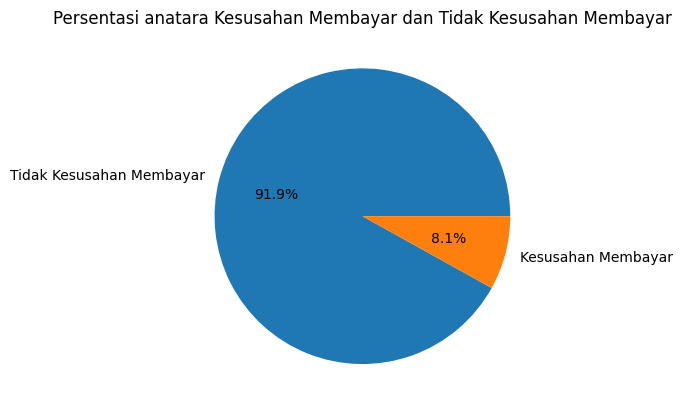

In [10]:
labels = [df_payment.Deskripsi[0], df_payment.Deskripsi[1]]
sizes = [df_payment.Persentasi[0], df_payment.Persentasi[1]]
fig, ax = plt.subplots()
plt.title('Persentasi anatara Kesusahan Membayar dan Tidak Kesusahan Membayar')
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

In [11]:
# membandingkan klien perempuan dan pria
jumlah_male = len(df_analisis[df_analisis['CODE_GENDER']=='M'])
jumlah_female = len(df_analisis[df_analisis['CODE_GENDER']=='F'])
persen_male = (jumlah_male/len(df_analisis['CODE_GENDER'])) * 100
persen_female = (jumlah_female/len(df_analisis['CODE_GENDER'])) * 100
df_gender = pd.DataFrame({
    'Gender' : ['Male', 'Female'],
    'Jumlah' : [jumlah_male, jumlah_female],
    'Persentasi' : [persen_male, persen_female]
})

jumlah_0_male = len(df_analisis[(df_analisis['TARGET']==0) & (df_analisis['CODE_GENDER']=='M')])
jumlah_0_female = len(df_analisis[(df_analisis['TARGET']==0) & (df_analisis['CODE_GENDER']=='F')])
persen_0_male = (jumlah_0_male/df_payment.Jumlah[0]) * 100
persen_0_female = (jumlah_0_female/df_payment.Jumlah[0]) * 100

df_0_gender = pd.DataFrame({
    'Target' : [0,0],
    'Deskripsi' : ['Pria Tidak Kesusahan Membayar', 'Wanita Tidak Kesusahan Membayar'],
    'Jumlah' : [jumlah_0_male, jumlah_0_female],
    'Persentasi' : [persen_0_male, persen_0_female]
})

jumlah_1_male = len(df_analisis[(df_analisis['TARGET']==1) & (df_analisis['CODE_GENDER']=='M')])
jumlah_1_female = len(df_analisis[(df_analisis['TARGET']==1) & (df_analisis['CODE_GENDER']=='F')])
persen_1_male = (jumlah_1_male/df_payment.Jumlah[1]) * 100
persen_1_female = (jumlah_1_female/df_payment.Jumlah[1]) * 100

df_1_gender = pd.DataFrame({
    'Target' : [1,1],
    'Deskripsi' : ['Pria Kesusahan Membayar', 'Wanita Kesusahan Membayar'],
    'Jumlah' : [jumlah_1_male, jumlah_1_female],
    'Persentasi' : [persen_1_male, persen_1_female]
})

display(df_gender)
display(df_0_gender)
display(df_1_gender)

,Gender,Jumlah,Persentasi
0,Male,105059,34.164306
1,Female,202448,65.834393


,Target,Deskripsi,Jumlah,Persentasi
0,0,Pria Tidak Kesusahan Membayar,94404,33.395357
1,0,Wanita Tidak Kesusahan Membayar,188278,66.603228


,Target,Deskripsi,Jumlah,Persentasi
0,1,Pria Kesusahan Membayar,10655,42.920443
1,1,Wanita Kesusahan Membayar,14170,57.079557


([<matplotlib.patches.Wedge at 0x7fc912ca01c0>,
 [Text(0.24263987993884248, 1.0729053493497291, 'Pria Kesusahan Membayar'),
  Text(-0.24263998039148998, -1.0729053266321393, 'Wanita Kesusahan Membayar')],
 [Text(0.1323490254211868, 0.5852210996453068, '42.9%'),
  Text(-0.13234908021353997, -0.5852210872538941, '57.1%')])

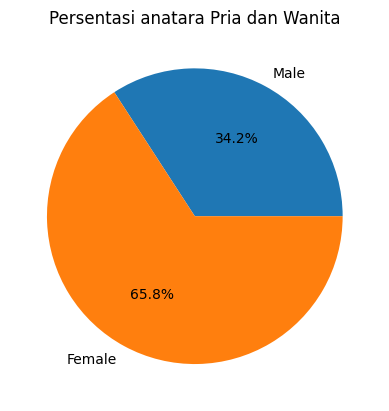

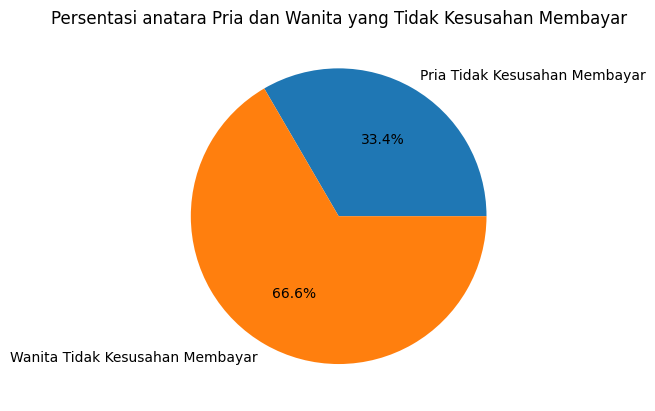

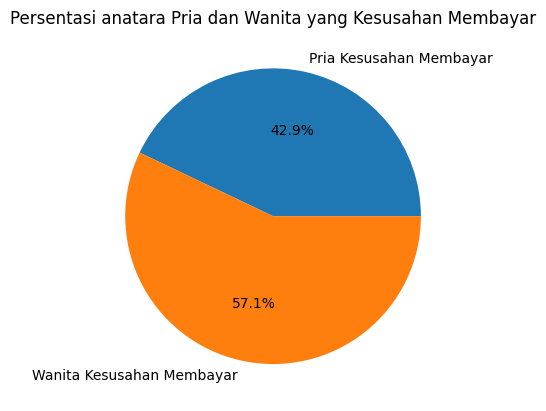

In [12]:
labels = [df_gender.Gender[0], df_gender.Gender[1]]
sizes = [df_gender.Persentasi[0], df_gender.Persentasi[1]]
fig, ax = plt.subplots()
plt.title('Persentasi anatara Pria dan Wanita')
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

labels = [df_0_gender.Deskripsi[0], df_0_gender.Deskripsi[1]]
sizes = [df_0_gender.Persentasi[0], df_0_gender.Persentasi[1]]
fig, ax = plt.subplots()
plt.title('Persentasi anatara Pria dan Wanita yang Tidak Kesusahan Membayar')
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

labels = [df_1_gender.Deskripsi[0], df_1_gender.Deskripsi[1]]
sizes = [df_1_gender.Persentasi[0], df_1_gender.Persentasi[1]]
fig, ax = plt.subplots()
plt.title('Persentasi anatara Pria dan Wanita yang Kesusahan Membayar')
plt.pie(sizes, labels=labels, autopct='%1.1f%%')

In [13]:
# Membuat variabel yang menampung data umur klien yang tidak kesulitan dan yang kesulitan
age_no = abs(df_analisis[df_analisis['TARGET']==0]['DAYS_BIRTH'].values / 365)
age_yes = abs(df_analisis[df_analisis['TARGET']==0]['DAYS_BIRTH'].values / 365)

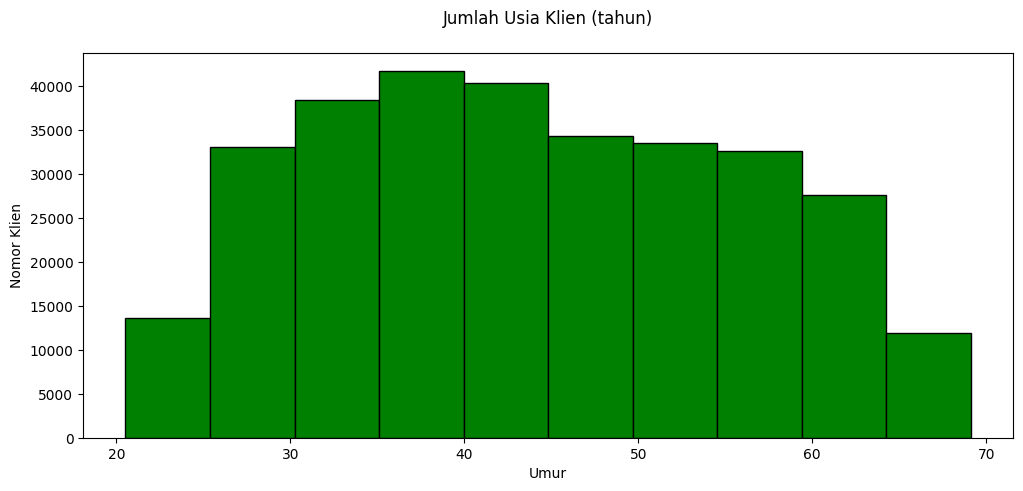

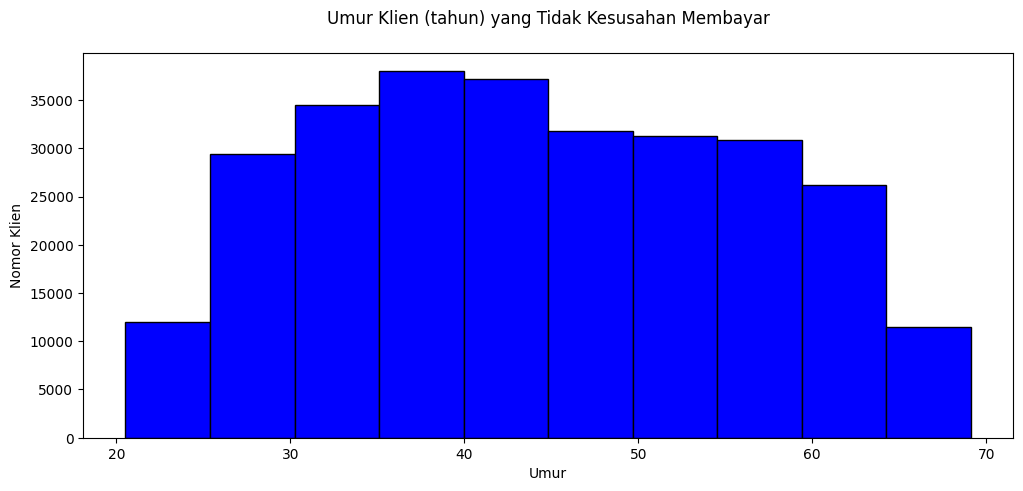

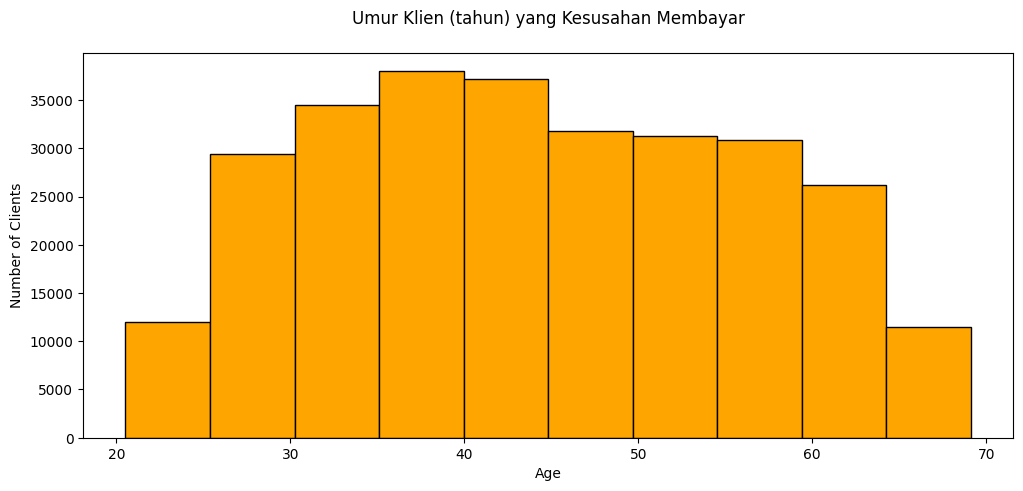

In [14]:
# Membuat histogram umur dari semua klien
plt.figure(figsize=(12,5))
plt.hist(abs(df_analisis['DAYS_BIRTH'].values/365), bins=10, edgecolor='black', color='green')
plt.title('Jumlah Usia Klien (tahun)\n')
plt.xlabel('Umur')
plt.ylabel('Nomor Klien')
plt.show()

# Membuat histogram umur dari klien yang tidak kesulitan membayar
plt.figure(figsize=(12,5))
plt.hist(age_no, bins=10, edgecolor='black', color='blue')
plt.title('Umur Klien (tahun) yang Tidak Kesusahan Membayar\n')
plt.xlabel('Umur')
plt.ylabel('Nomor Klien')
plt.show()

# Membuat histogram umur dari klien yang tidak kesulitan dalam membayar
plt.figure(figsize=(12,5))
plt.hist(age_yes, bins=10, edgecolor='black', color='orange')
plt.title('Umur Klien (tahun) yang Kesusahan Membayar\n')
plt.xlabel('Age')
plt.ylabel('Number of Clients')
plt.show()

In [15]:
df_analisis_employed = df_analisis[df_analisis['DAYS_EMPLOYED'] != 365243]
# Membuat variabel yang menampung data lama bekerja klien yang tidak kesulitan dan yang kesulitan dalam membayar
days_employed_no = abs(df_analisis_employed[df_analisis_employed['TARGET']==0]['DAYS_EMPLOYED'].values / 365)
days_employed_yes = abs(df_analisis_employed[df_analisis_employed['TARGET']==1]['DAYS_EMPLOYED'].values / 365)

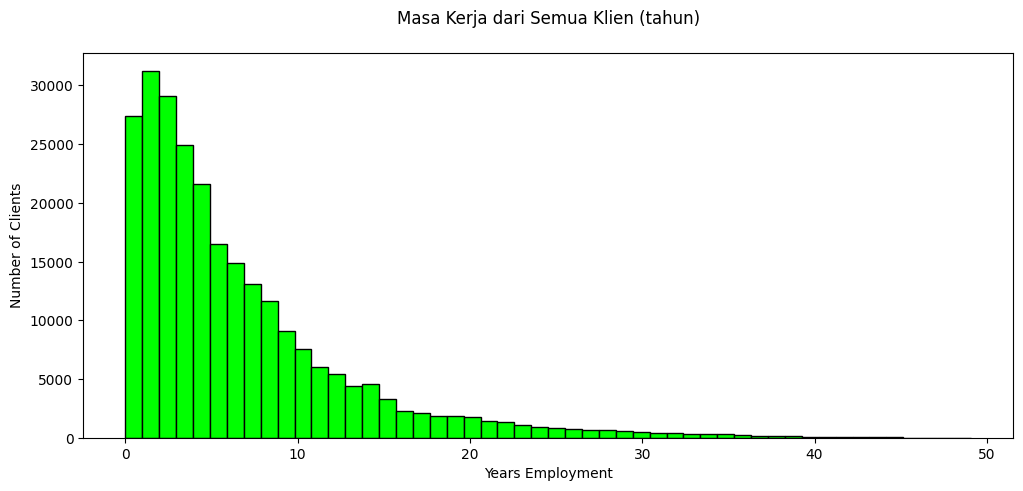

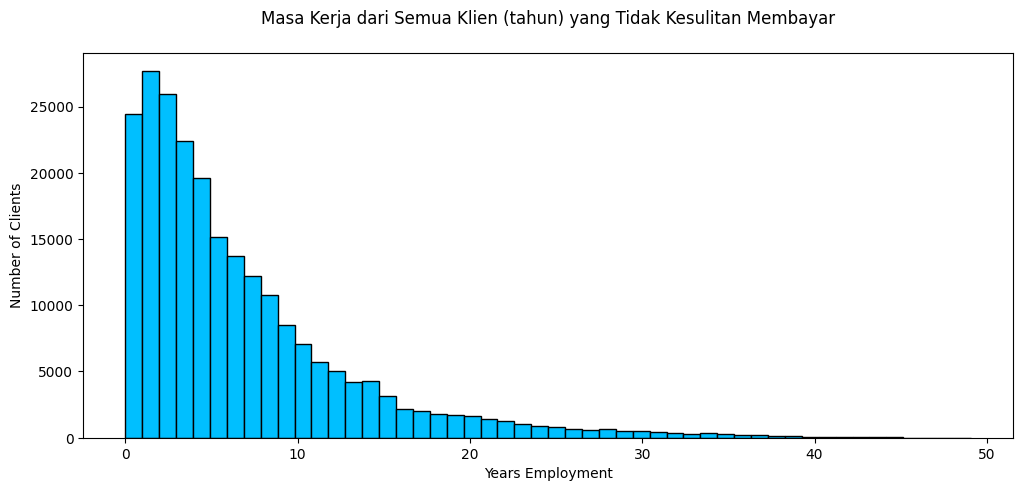

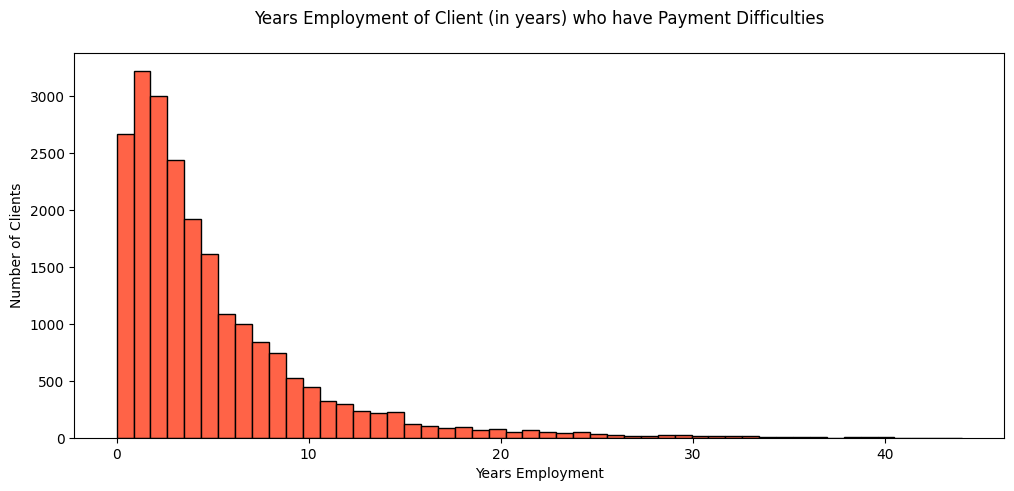

In [16]:
# Membuat histogram masa kerja dari semua klien
plt.figure(figsize=(12,5))
plt.hist(abs(df_analisis_employed['DAYS_EMPLOYED'].values/365), bins=50, edgecolor='black', color='lime')
plt.title('Masa Kerja dari Semua Klien (tahun)\n')
plt.xlabel('Years Employment')
plt.ylabel('Number of Clients')
plt.show()

# Membuat histogram masa kerja dari klien yang tidak kesulitan dalam membayar
plt.figure(figsize=(12,5))
plt.hist(days_employed_no, bins=50, edgecolor='black', color='deepskyblue')
plt.title('Masa Kerja dari Semua Klien (tahun) yang Tidak Kesulitan Membayar\n')
plt.xlabel('Years Employment')
plt.ylabel('Number of Clients')
plt.show()

# Membuat histogram masa kerja dari klien yang tidak kesulitan dalam membayar
plt.figure(figsize=(12,5))
plt.hist(days_employed_yes, bins=50, edgecolor='black', color='tomato')
plt.title('Years Employment of Client (in years) who have Payment Difficulties\n')
plt.xlabel('Years Employment')
plt.ylabel('Number of Clients')
plt.show()

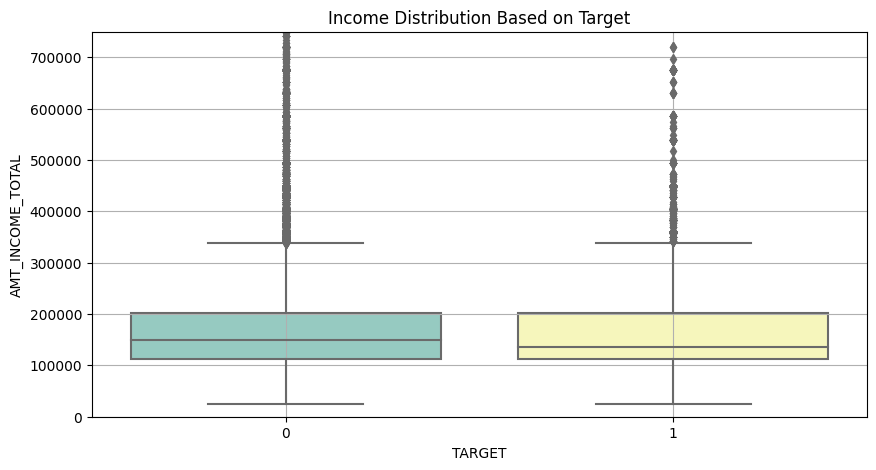

In [17]:
# Boxplot distribusi pendapatan berdasarkan kemampuan membayar
plt.figure(figsize=(10,5))
sns.boxplot(x='TARGET', y='AMT_INCOME_TOTAL', data=df_analisis, palette = 'Set3')
plt.ylim(0, 750000)
plt.title('Income Distribution Based on Target')
plt.grid()
plt.show()

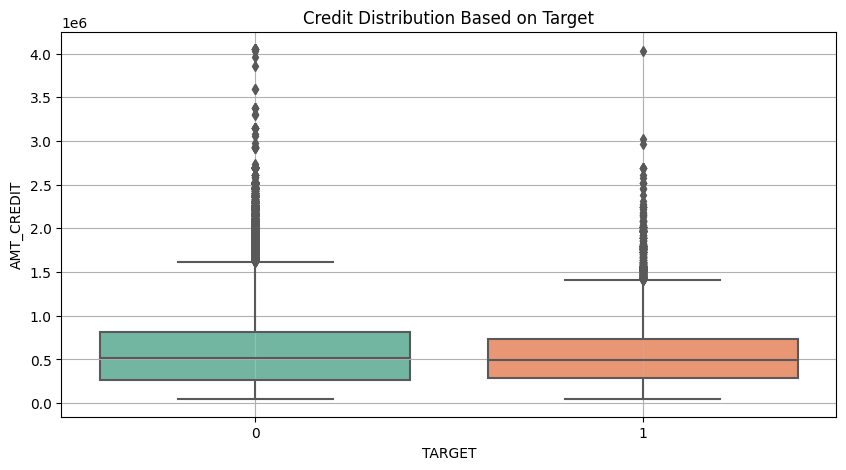

In [18]:
# Boxplot distribusi pendapatan
plt.figure(figsize=(10,5))
sns.boxplot(x='TARGET', y='AMT_CREDIT', data=df_analisis, palette = 'Set2')
plt.title('Credit Distribution Based on Target')
plt.grid()
plt.show()

In [19]:
# Menghitung klien yang tidak kesulitan dalam membayar berdasarkan jumlah anak yang dimiliki
children_no = df_analisis[df_analisis['TARGET']==0]['CNT_CHILDREN'].value_counts()
df_children_no = pd.DataFrame({
                'The Number of Children' : children_no.index,
                'Count' : children_no.values,
                'Percentage': (children_no.values/df_analisis['TARGET'].value_counts()[0])*100
})

df_children_no

,The Number of Children,Count,Percentage
0,0,198762,70.311936
1,1,55665,19.691460
2,2,24416,8.637145
3,3,3359,1.188244
4,4,374,0.132302
5,5,77,0.027239
6,6,15,0.005306
7,7,7,0.002476
8,14,3,0.001061
9,8,2,0.000707


In [20]:

# Menghitung klien yang kesulitan dalam membayar berdasarkan jumlah anak yang dimiliki
children_yes = df_analisis[df_analisis['TARGET']==1]['CNT_CHILDREN'].value_counts()
df_children_yes = pd.DataFrame({
                'The Number of Children' : children_yes.index,
                'Count' : children_yes.values,
                'Percentage': (children_yes.values/df_analisis['TARGET'].value_counts()[1])*100
})

df_children_yes

,The Number of Children,Count,Percentage
0,0,16609,66.904330
1,1,5454,21.969789
2,2,2333,9.397784
3,3,358,1.442095
4,4,55,0.221551
5,5,7,0.028197
6,6,6,0.024169
7,9,2,0.008056
8,11,1,0.004028


In [21]:
# Pinjaman berdasarkan jenisnya dan kemampuan membayar klien
contract_target = df_analisis.groupby(by=['NAME_CONTRACT_TYPE', 'TARGET'], as_index=False)['SK_ID_CURR'].count()
contract_target     

,NAME_CONTRACT_TYPE,TARGET,SK_ID_CURR
0,Cash loans,0,255011
1,Cash loans,1,23221
2,Revolving loans,0,27675
3,Revolving loans,1,1604


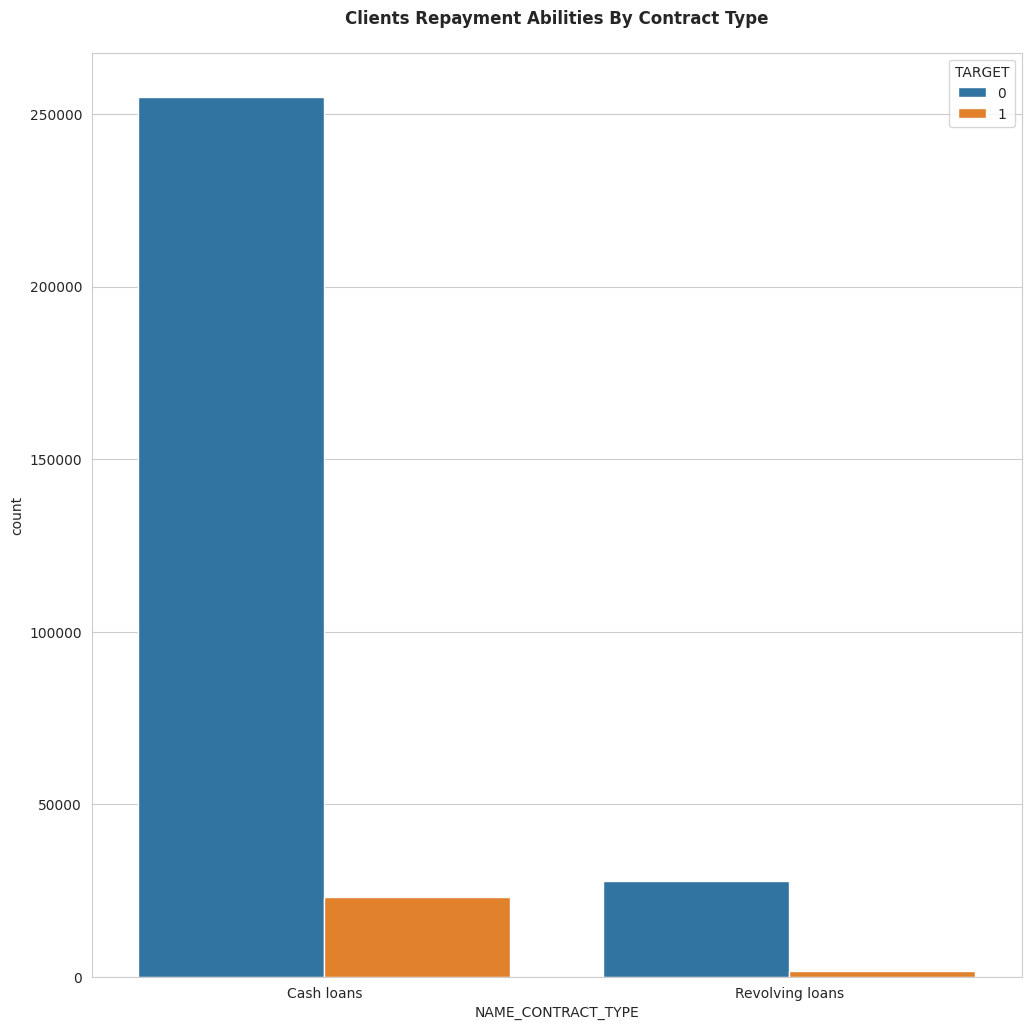

In [22]:
# Grafik kemampuan membayar klien berdasarkan jenis pinjaman
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.countplot(data=df_analisis, x='NAME_CONTRACT_TYPE', hue='TARGET')
plt.title('Clients Repayment Abilities By Contract Type\n', fontweight='bold', size = 12)
plt.show()

In [23]:
# Menghitung banyaknya klien berdasarkan kemampuan membayar dan status pernikahan
gender_target = df_analisis.groupby(by=['NAME_FAMILY_STATUS','TARGET'], as_index=False)['SK_ID_CURR'].count()
gender_target

,NAME_FAMILY_STATUS,TARGET,SK_ID_CURR
0,Civil marriage,0,26814
1,Civil marriage,1,2961
2,Married,0,181582
3,Married,1,14850
4,Separated,0,18150
5,Separated,1,1620
6,Single / not married,0,40987
7,Single / not married,1,4457
8,Unknown,0,2
9,Widow,0,15151


In [24]:
df[['NAME_FAMILY_STATUS','TARGET']].groupby(['NAME_FAMILY_STATUS'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_FAMILY_STATUS,TARGET
0,Civil marriage,0.099446
3,Single / not married,0.098077
2,Separated,0.081942
1,Married,0.075599
5,Widow,0.058242
4,Unknown,0.000000


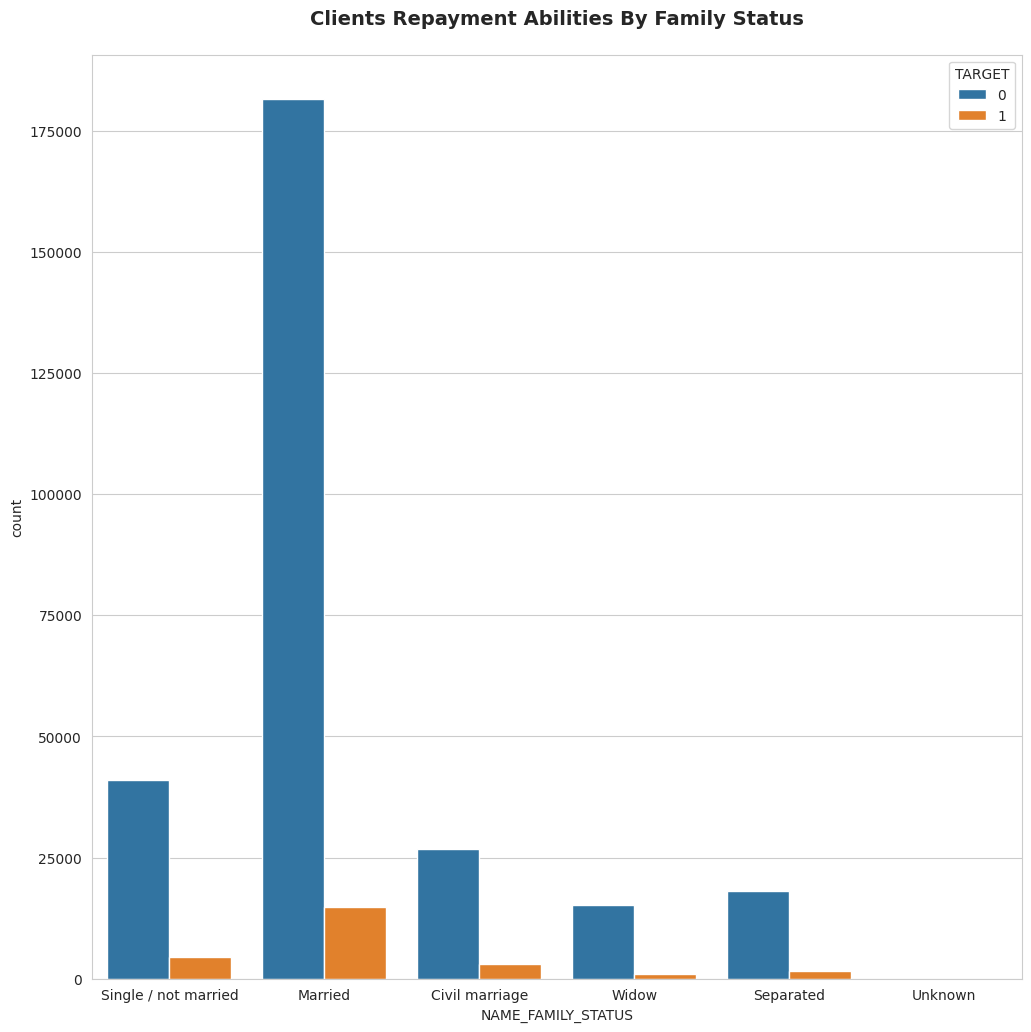

In [25]:
# Grafik banyaknya klien berdasarkan kemampuan membayar dan satus pernikahan
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.countplot(data=df_analisis, x='NAME_FAMILY_STATUS', hue='TARGET')
plt.title('Clients Repayment Abilities By Family Status\n', fontweight='bold', size = 14)
plt.show()

In [26]:
# Menghitung banyaknya klien berdasarkan kemampuan membayar dan jenis tempat tinggal
housing_target = df_analisis.groupby(by=['NAME_HOUSING_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
housing_target

,NAME_HOUSING_TYPE,TARGET,SK_ID_CURR
0,Co-op apartment,0,1033
1,Co-op apartment,1,89
2,House / apartment,0,251596
3,House / apartment,1,21272
4,Municipal apartment,0,10228
5,Municipal apartment,1,955
6,Office apartment,0,2445
7,Office apartment,1,172
8,Rented apartment,0,4280
9,Rented apartment,1,601


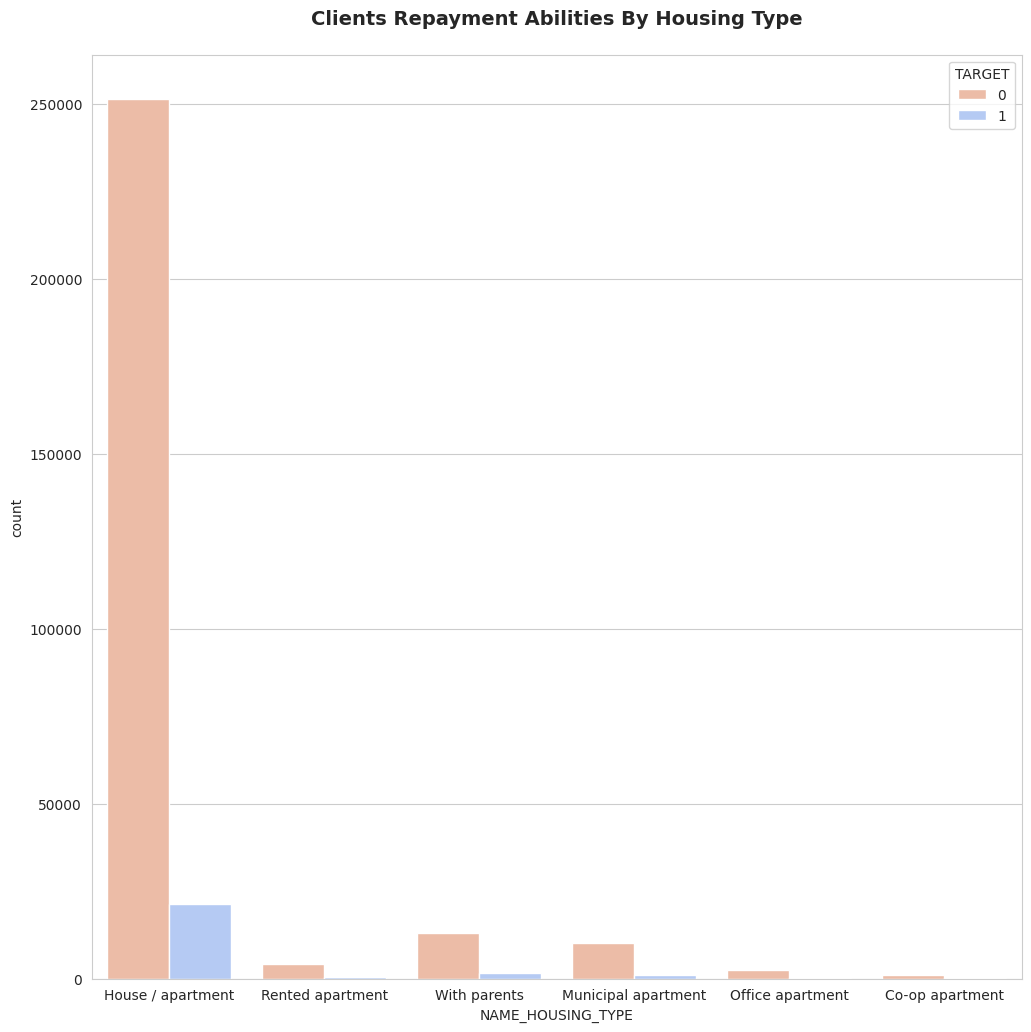

In [27]:
# Grafik banyaknya klien berdasarkan kemampuan membayar dan jenis tempat tinggal
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.countplot(data=df_analisis, x='NAME_HOUSING_TYPE', hue='TARGET', palette='coolwarm_r')
plt.title('Clients Repayment Abilities By Housing Type\n', fontweight='bold', size = 14)
plt.show()

In [28]:
df[['NAME_HOUSING_TYPE','TARGET']].groupby(['NAME_HOUSING_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)

,NAME_HOUSING_TYPE,TARGET
4,Rented apartment,0.123131
5,With parents,0.116981
2,Municipal apartment,0.085397
0,Co-op apartment,0.079323
1,House / apartment,0.077957
3,Office apartment,0.065724


In [29]:
# Menghitung banyaknya klien berdasarkan kemampuan membayar dan jenis pekerjaan
occupation_target = df_analisis.groupby(by=['OCCUPATION_TYPE','TARGET'], as_index=False)['SK_ID_CURR'].count()
occupation_target

,OCCUPATION_TYPE,TARGET,SK_ID_CURR
0,Accountants,0,9339
1,Accountants,1,474
2,Cleaning staff,0,4206
3,Cleaning staff,1,447
4,Cooking staff,0,5325
5,Cooking staff,1,621
6,Core staff,0,25832
7,Core staff,1,1738
8,Drivers,0,16496
9,Drivers,1,2107


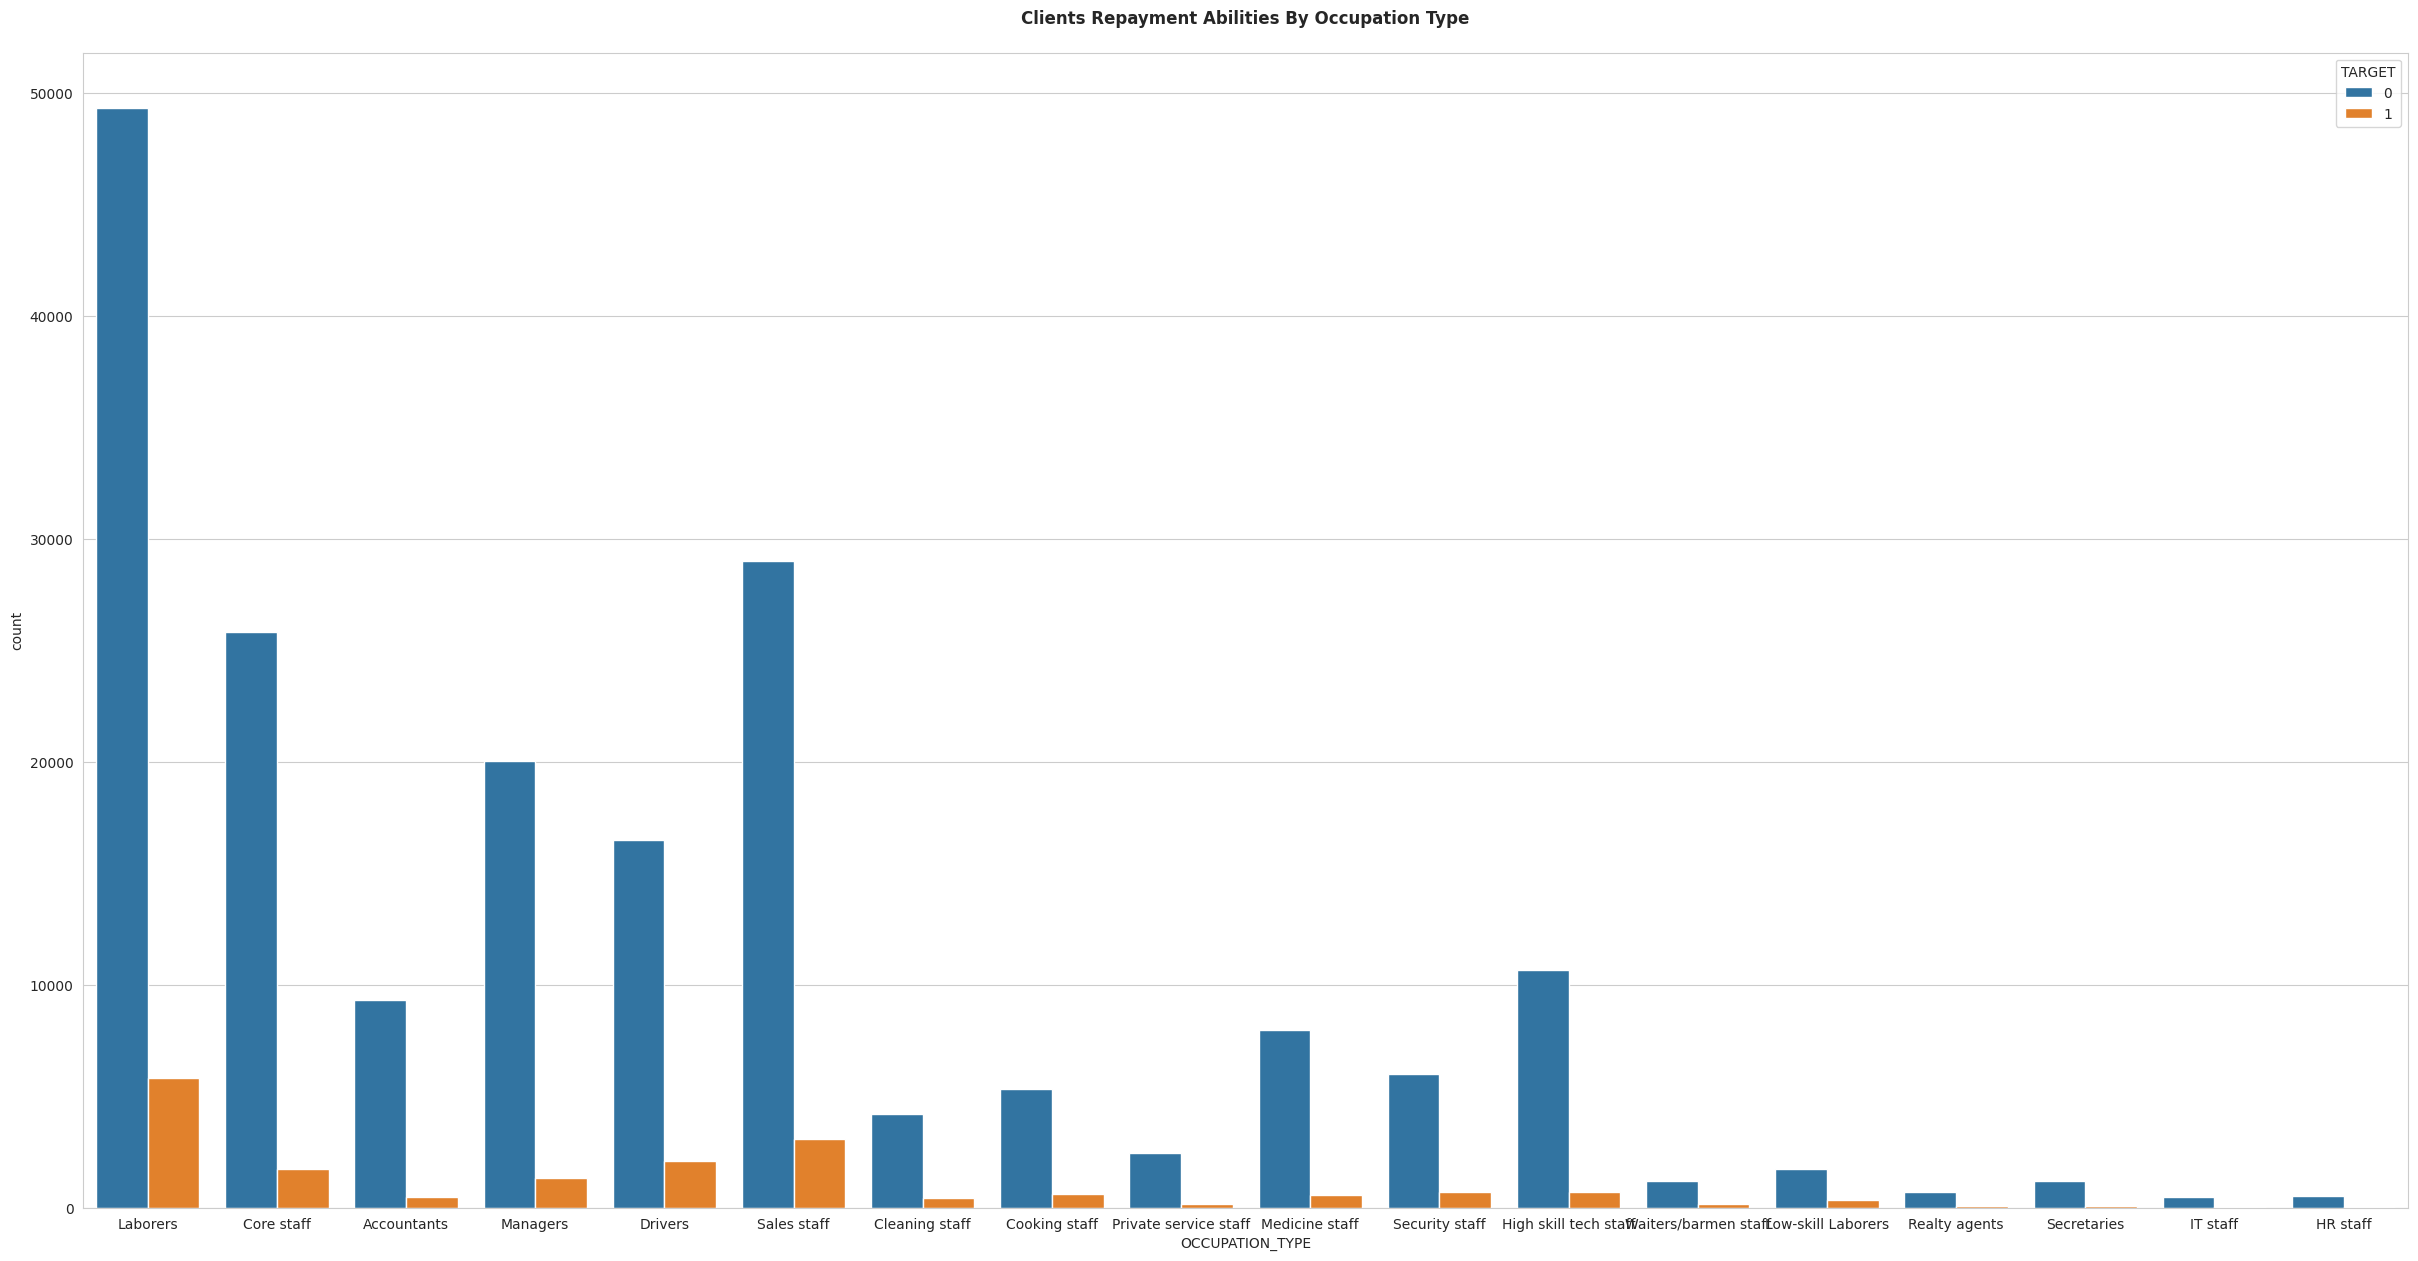

In [30]:
# Grafik banyaknya klien berdasarkan kemampuan membayar dan jenis pekerjaan
plt.figure(figsize=(30,15))
sns.set_style('whitegrid')
sns.countplot(data=df_analisis, x='OCCUPATION_TYPE', hue='TARGET')
plt.title('Clients Repayment Abilities By Occupation Type\n', fontweight='bold', size = 12)
plt.show()

In [31]:
occupation = df[['OCCUPATION_TYPE','TARGET']].groupby(['OCCUPATION_TYPE'],as_index=False).mean().sort_values(by=['TARGET'], ascending=False)
occupation

,OCCUPATION_TYPE,TARGET
9,Low-skill Laborers,0.171524
4,Drivers,0.113261
17,Waiters/barmen staff,0.112760
16,Security staff,0.107424
8,Laborers,0.105788
2,Cooking staff,0.104440
14,Sales staff,0.096318
1,Cleaning staff,0.096067
13,Realty agents,0.078562
15,Secretaries,0.070498


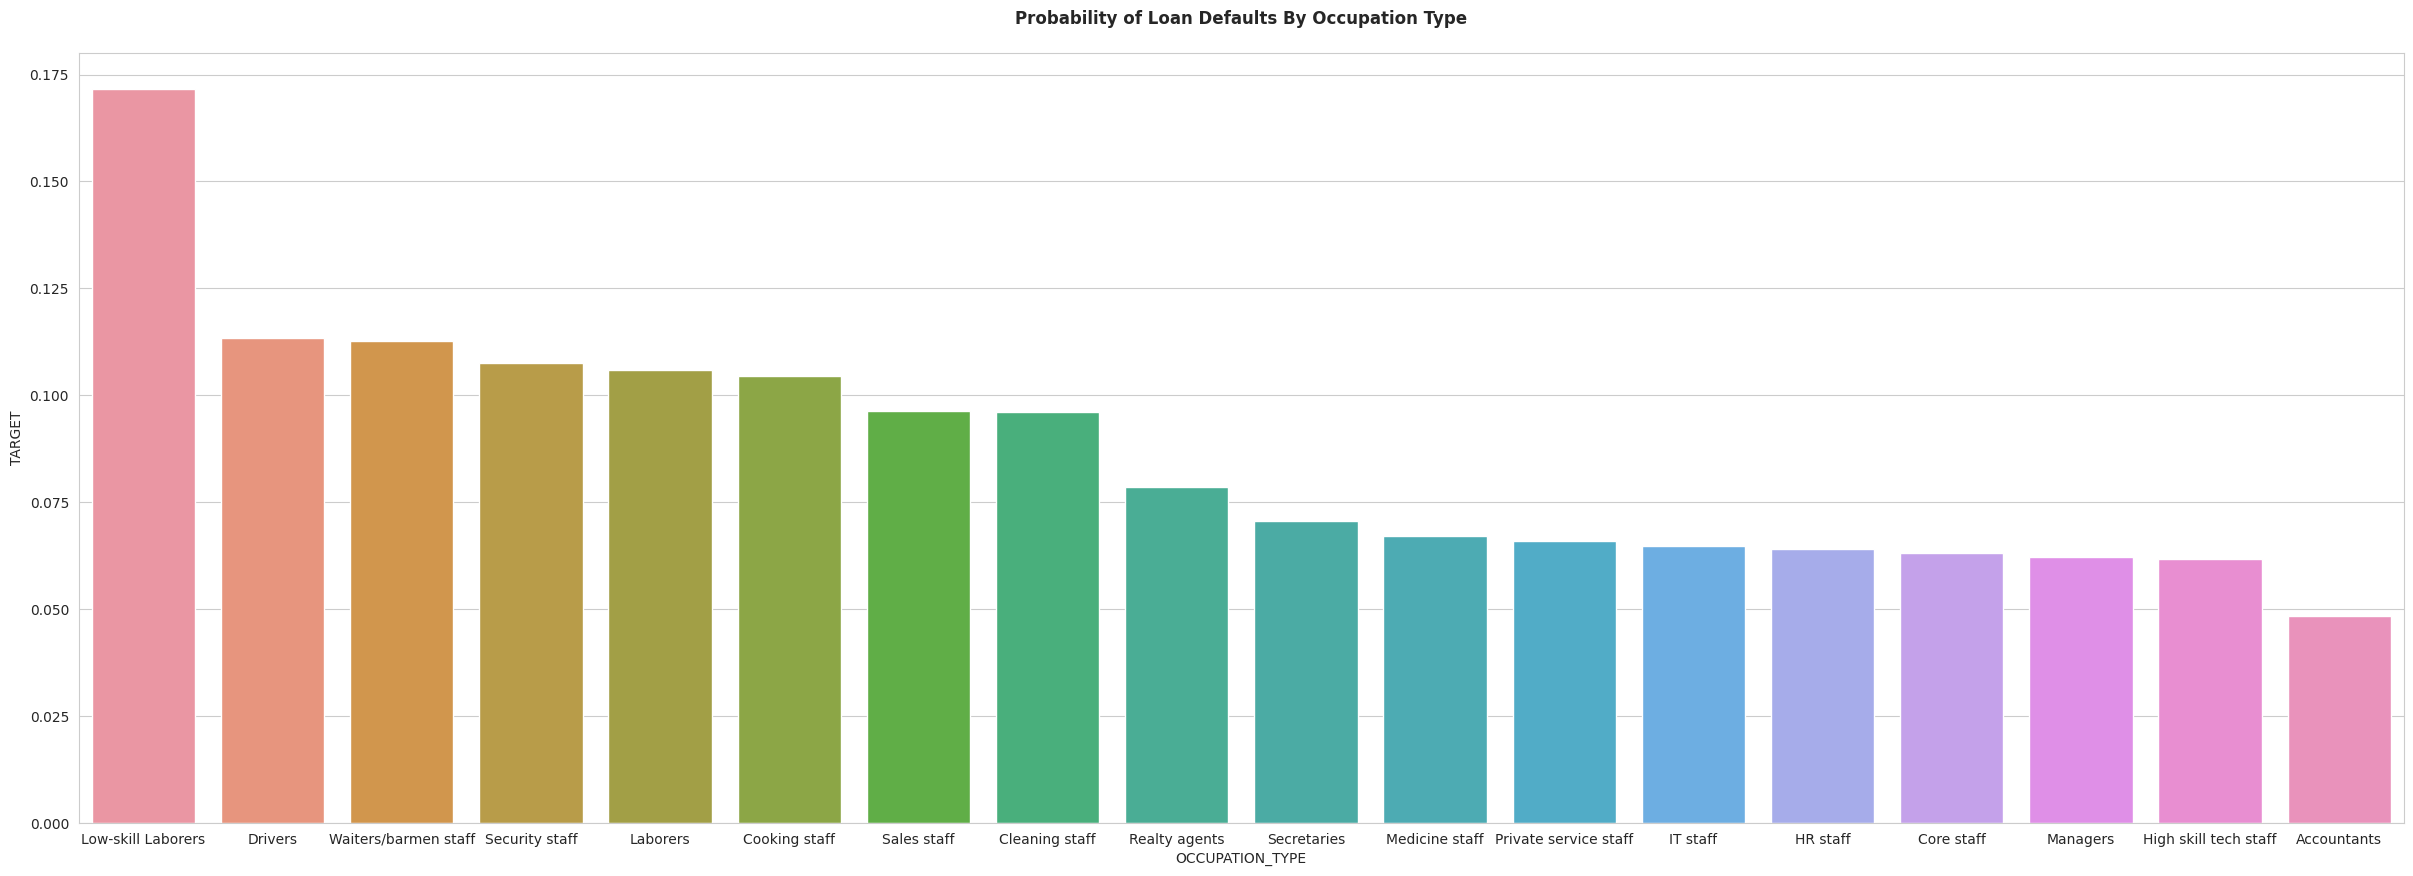

In [32]:
# Grafik banyaknya klien berdasarkan kemampuan membayar dan jenis pekerjaan
plt.figure(figsize=(30,10))
sns.set_style('whitegrid')
sns.barplot(data=occupation, x='OCCUPATION_TYPE', y='TARGET')
plt.title('Probability of Loan Defaults By Occupation Type\n', fontweight='bold', size = 12)
plt.show()

In [33]:
# Menghitung banyaknya klien berdasarkan kemampuan membayar dan kepemilikan mobil
df_analisis['FLAG_OWN_CAR'] = df_analisis['FLAG_OWN_CAR'].replace(['Y','N'],['Yes','No'])
car_target = df_analisis.groupby(by=['FLAG_OWN_CAR','TARGET'], as_index=False)['SK_ID_CURR'].count()
car_target

,FLAG_OWN_CAR,TARGET,SK_ID_CURR
0,No,0,185675
1,No,1,17249
2,Yes,0,97011
3,Yes,1,7576


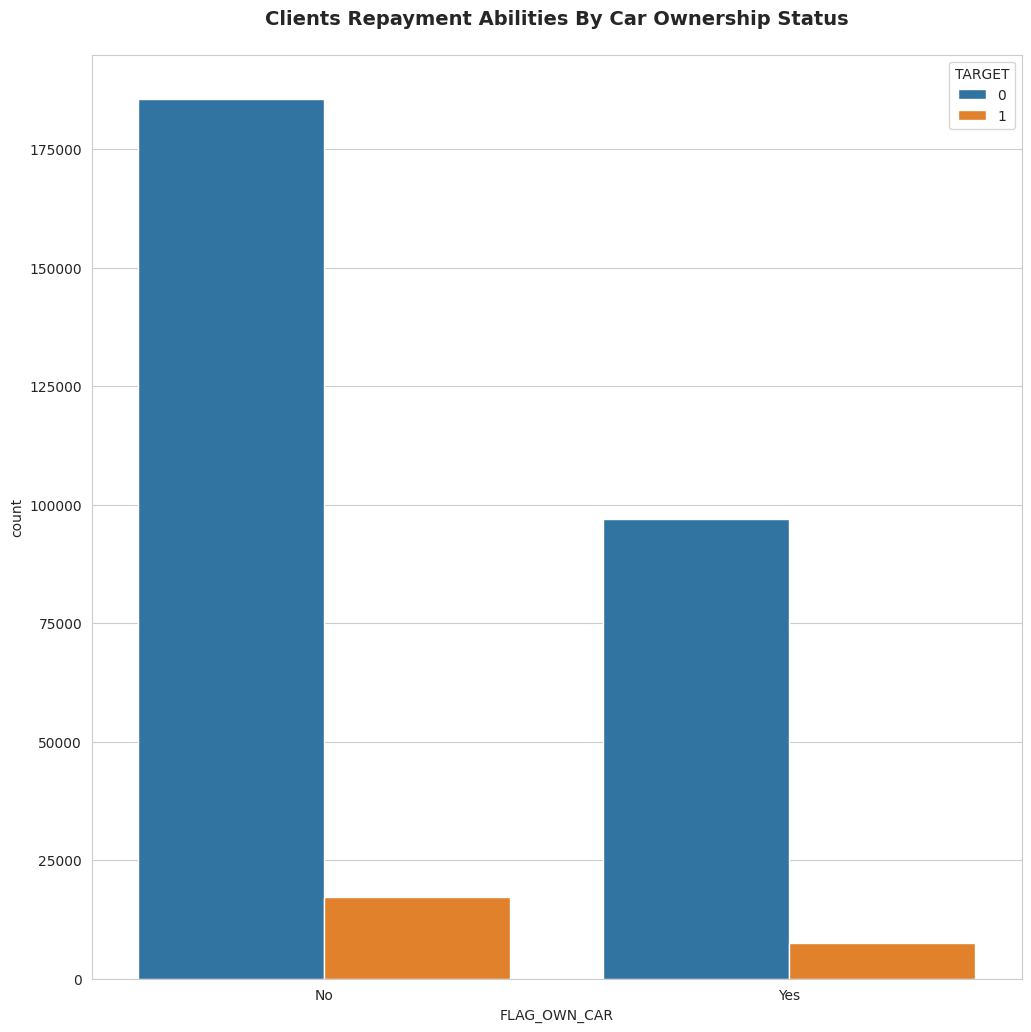

In [34]:
# Grafik banyaknya klien berdasarkan kemampuan membayar dan kepemilikan mobil
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.countplot(data=df_analisis, x='FLAG_OWN_CAR', hue='TARGET')
plt.title('Clients Repayment Abilities By Car Ownership Status\n', fontweight='bold', size = 14)
plt.show()

In [35]:
# Menghitung banyaknya klien berdasarkan kemampuan membayar dan kepemilikan rumah/apartemen
df_analisis['FLAG_OWN_REALTY'] = df_analisis['FLAG_OWN_REALTY'].replace(['Y','N'],['Yes','No'])
realty_target = df_analisis.groupby(by=['FLAG_OWN_REALTY','TARGET'], as_index=False)['SK_ID_CURR'].count()
realty_target

,FLAG_OWN_REALTY,TARGET,SK_ID_CURR
0,No,0,86357
1,No,1,7842
2,Yes,0,196329
3,Yes,1,16983


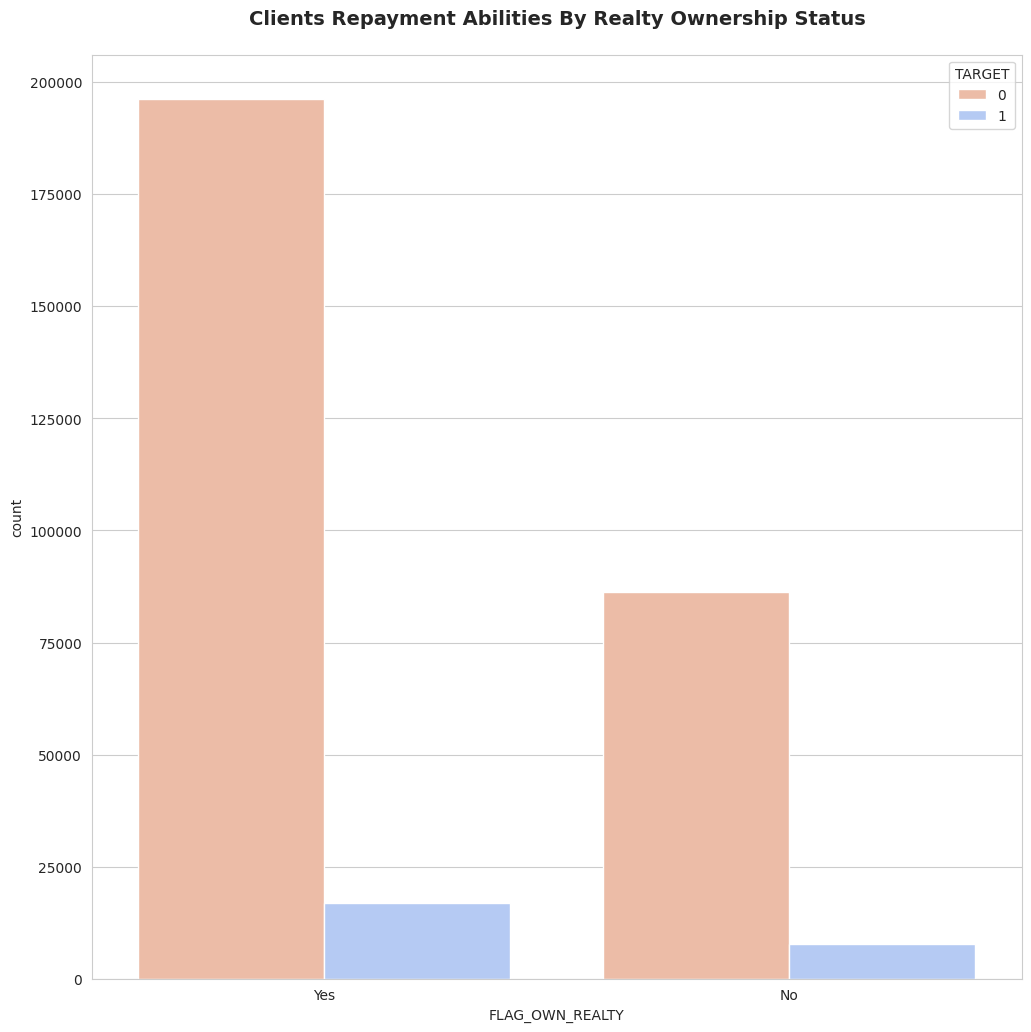

In [36]:
# Grafik banyaknya klien berdasarkan kemampuan membayar dan kepemilikan rumah/apartemen
plt.figure(figsize=(12,12))
sns.set_style('whitegrid')
sns.countplot(data=df_analisis, x='FLAG_OWN_REALTY', hue='TARGET', palette='coolwarm_r')
plt.title('Clients Repayment Abilities By Realty Ownership Status\n', fontweight='bold', size = 14)
plt.show()

### **Data Correlation**

In [37]:
# Mencari nilai korelasi antar variabel independen terhadap variabel'TARGET'
corr1 = df.corr()['TARGET'].sort_values()

# Menunjukkan lima nilai korelasi negatif terkuat
print('Features with Strongest Negative Correlation:')
corr1.head()

<ipython-input-37-581905369c41>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr1 = df.corr()['TARGET'].sort_values()


Features with Strongest Negative Correlation:


EXT_SOURCE_3    -0.178919
EXT_SOURCE_2    -0.160472
EXT_SOURCE_1    -0.155317
DAYS_EMPLOYED   -0.044932
FLOORSMAX_AVG   -0.044003
Name: TARGET, dtype: float64

In [38]:
# Menunjukkan lima nilai korelasi positif terkuat
print('Features with Strongest Positive Correlation:')
corr1.tail()

Features with Strongest Positive Correlation:


DAYS_LAST_PHONE_CHANGE         0.055218
REGION_RATING_CLIENT           0.058899
REGION_RATING_CLIENT_W_CITY    0.060893
DAYS_BIRTH                     0.078239
TARGET                         1.000000
Name: TARGET, dtype: float64

### **Data Cleaning**

In [39]:
#Cek data duplikat
duplicated_dataset = df[df.duplicated()]
duplicated_dataset

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [40]:
# Mengecek jumlah data yang salah
error = df[df['DAYS_EMPLOYED'] == 365243]
print('Jumlah error :', len(error))
error['TARGET'].value_counts()

Jumlah error : 55374


0    52384
1     2990
Name: TARGET, dtype: int64

In [41]:
# Mengganti nilai yang salah dengan Nan
df['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

In [42]:
# Mengecek variabel yang memiliki missing value
mv_data = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
mv_data['Percentage'] = (mv_data['Total Null Values'] / df.shape[0])*100
mv_data.sort_values(by=['Percentage'], ascending=False).reset_index()

,index,Total Null Values,Percentage
0,COMMONAREA_AVG,214865,69.872297
1,COMMONAREA_MODE,214865,69.872297
2,COMMONAREA_MEDI,214865,69.872297
3,NONLIVINGAPARTMENTS_AVG,213514,69.432963
4,NONLIVINGAPARTMENTS_MODE,213514,69.432963
...,...,...,...
117,NAME_HOUSING_TYPE,0,0.000000
118,NAME_FAMILY_STATUS,0,0.000000
119,NAME_EDUCATION_TYPE,0,0.000000
120,NAME_INCOME_TYPE,0,0.000000


In [43]:
# Menghapus feature/kolom yang memiliki banyak missing value (±50%)
df.drop(df.iloc[:, 44:91], axis=1, inplace=True)
df.drop(['OWN_CAR_AGE', 'EXT_SOURCE_1'], axis=1, inplace=True)

In [44]:
# Mengecek dataset setelah penghapusan beberapa variabel
mv_data = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
mv_data['Percentage'] = (mv_data['Total Null Values'] / df.shape[0])*100
mv_data.sort_values(by=['Percentage'], ascending=False).reset_index()

,index,Total Null Values,Percentage
0,OCCUPATION_TYPE,96391,31.345545
1,EXT_SOURCE_3,60965,19.825307
2,DAYS_EMPLOYED,55374,18.007161
3,AMT_REQ_CREDIT_BUREAU_DAY,41519,13.501631
4,AMT_REQ_CREDIT_BUREAU_HOUR,41519,13.501631
...,...,...,...
68,REG_REGION_NOT_WORK_REGION,0,0.000000
69,LIVE_REGION_NOT_WORK_REGION,0,0.000000
70,TARGET,0,0.000000
71,REG_CITY_NOT_WORK_CITY,0,0.000000


<ipython-input-45-012856fc2079>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AMT_REQ_CREDIT_BUREAU_YEAR'], ax=ax[0][0])
<ipython-input-45-012856fc2079>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AMT_REQ_CREDIT_BUREAU_MON'], ax=ax[0][1])
<ipython-input-45-012856fc2079>:9: UserWa

<Axes: xlabel='AMT_REQ_CREDIT_BUREAU_QRT', ylabel='Density'>

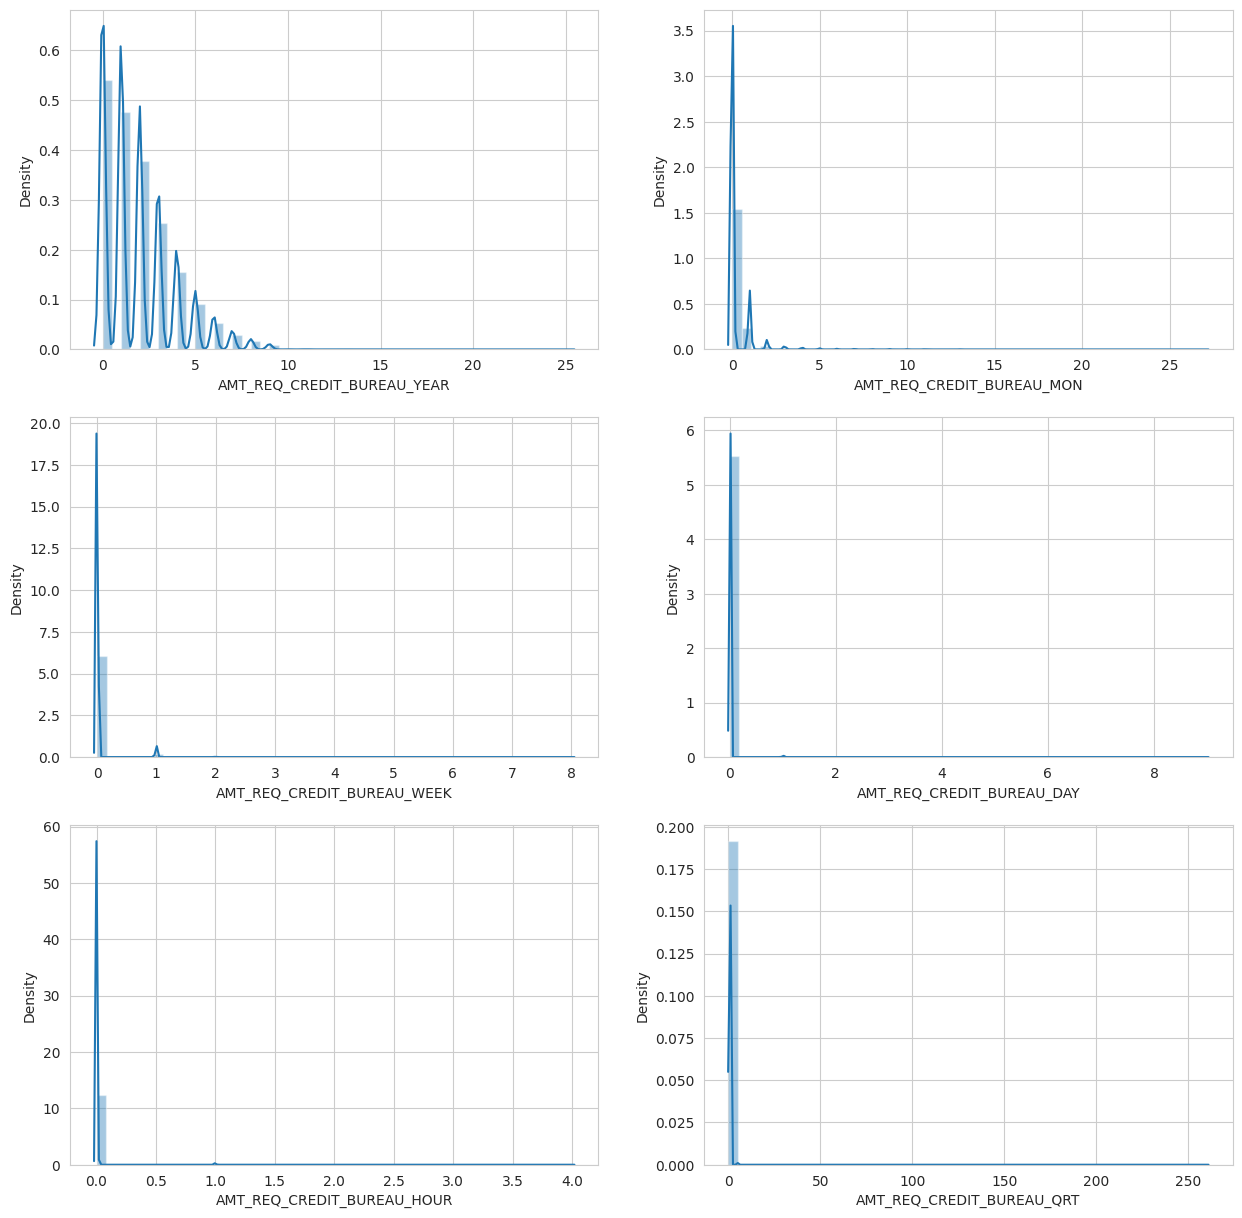

In [45]:
# Mengecek distribusi data variabel numerik yang memiliki missing values
sns.set_style('whitegrid')
fig, ax = plt.subplots(3,2, figsize=(15,15))

sns.distplot(df['AMT_REQ_CREDIT_BUREAU_YEAR'], ax=ax[0][0])

sns.distplot(df['AMT_REQ_CREDIT_BUREAU_MON'], ax=ax[0][1])

sns.distplot(df['AMT_REQ_CREDIT_BUREAU_WEEK'], ax=ax[1][0])

sns.distplot(df['AMT_REQ_CREDIT_BUREAU_DAY'], ax=ax[1][1])

sns.distplot(df['AMT_REQ_CREDIT_BUREAU_HOUR'], ax=ax[2][0])

sns.distplot(df['AMT_REQ_CREDIT_BUREAU_QRT'], ax=ax[2][1])

<ipython-input-46-1289ca2065cf>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['DEF_60_CNT_SOCIAL_CIRCLE'], ax=ax[0][0])
<ipython-input-46-1289ca2065cf>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['OBS_60_CNT_SOCIAL_CIRCLE'], ax=ax[0][1])
<ipython-input-46-1289ca2065cf>:9: UserWarni

<Axes: xlabel='OBS_30_CNT_SOCIAL_CIRCLE', ylabel='Density'>

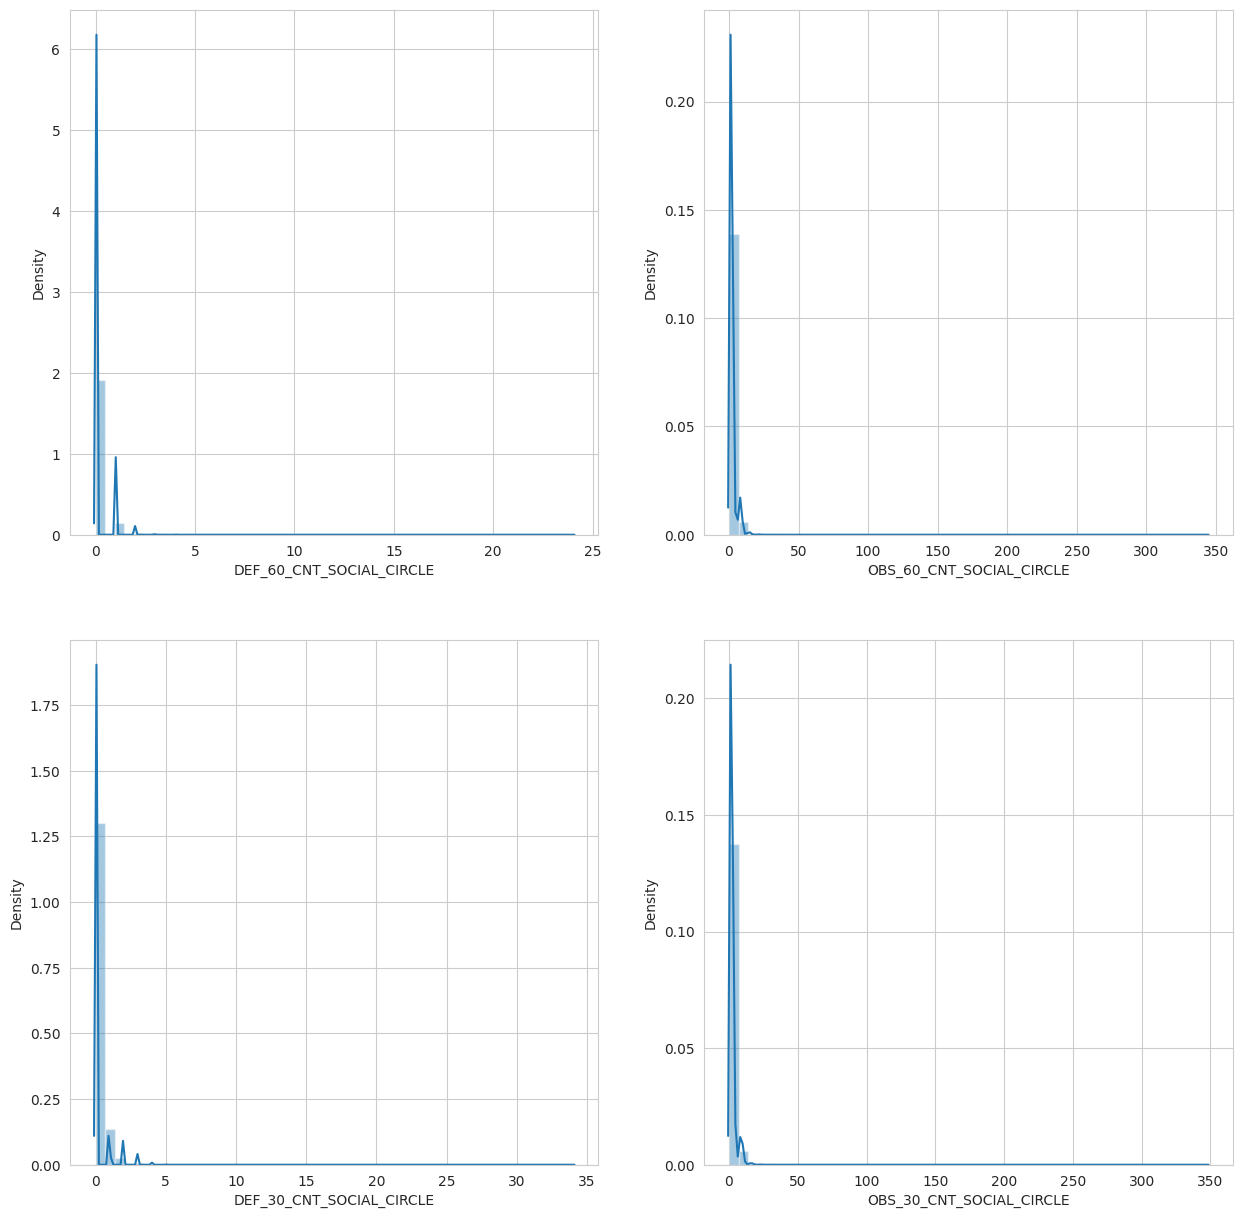

In [46]:
# Mengecek distribusi data variabel numerik yang memiliki missing values
sns.set_style('whitegrid')
fig, ax = plt.subplots(2,2, figsize=(15,15))

sns.distplot(df['DEF_60_CNT_SOCIAL_CIRCLE'], ax=ax[0][0])

sns.distplot(df['OBS_60_CNT_SOCIAL_CIRCLE'], ax=ax[0][1])

sns.distplot(df['DEF_30_CNT_SOCIAL_CIRCLE'], ax=ax[1][0])

sns.distplot(df['OBS_30_CNT_SOCIAL_CIRCLE'], ax=ax[1][1])

<ipython-input-47-50393a2f3a7c>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AMT_GOODS_PRICE'], ax=ax[0][0])
<ipython-input-47-50393a2f3a7c>:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['AMT_ANNUITY'], ax=ax[0][1])
<ipython-input-47-50393a2f3a7c>:9: UserWarning: 

`distplot` is a 

<Axes: xlabel='EXT_SOURCE_3', ylabel='Density'>

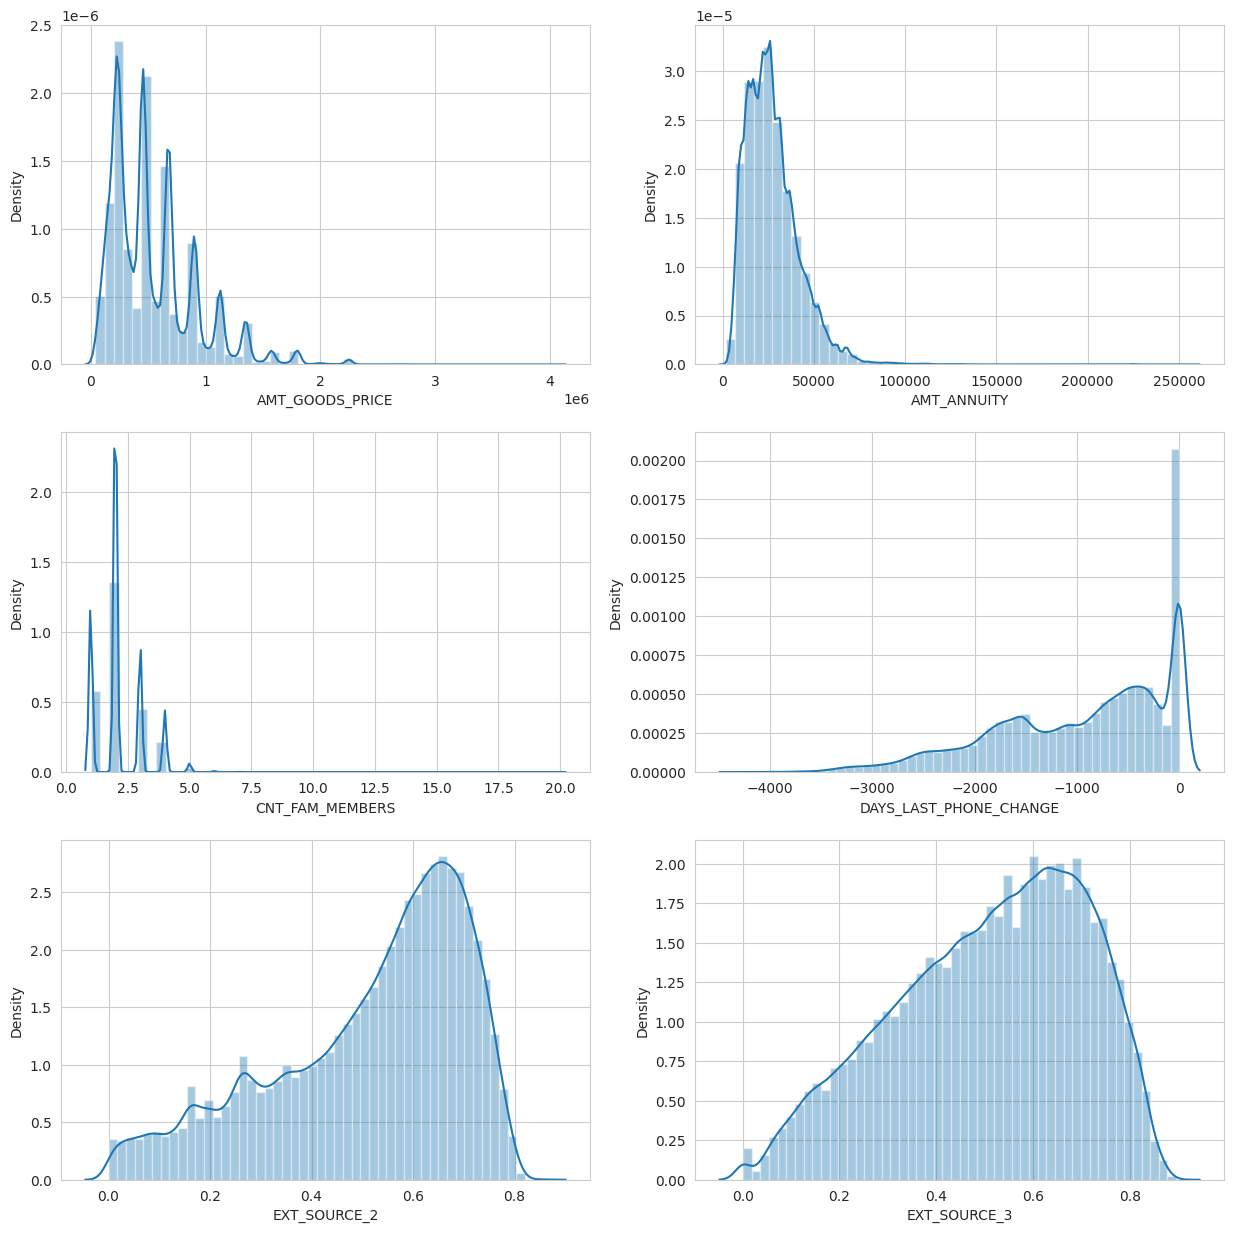

In [47]:
# Mengecek distribusi data variabel numerik yang memiliki missing values
sns.set_style('whitegrid')
fig, ax = plt.subplots(3,2, figsize=(15,15))

sns.distplot(df['AMT_GOODS_PRICE'], ax=ax[0][0])

sns.distplot(df['AMT_ANNUITY'], ax=ax[0][1])

sns.distplot(df['CNT_FAM_MEMBERS'], ax=ax[1][0])

sns.distplot(df['DAYS_LAST_PHONE_CHANGE'], ax=ax[1][1])

sns.distplot(df['EXT_SOURCE_2'], ax=ax[2][0])

sns.distplot(df['EXT_SOURCE_3'], ax=ax[2][1])

In [48]:
# Mengisi missing values dengan median untuk variabel numerik
# Mengisi missing values dengan modus untuk variabel kategorik

numeric_features = df.select_dtypes(include=['int64','float64']).columns.tolist()
category_features = df.select_dtypes(include=['object']).columns.tolist()

for feature in df:
    if df[feature].isnull().any():
        if(feature in category_features):
            df[feature]=df[feature].fillna(df[feature].mode()[0])
        else:
            df[feature]=df[feature].fillna(df[feature].median())

In [49]:
# Mengecek dataset setelah dilakukan pengisisan pada beberapa variabel
mv_data = pd.DataFrame(df.isnull().sum(), columns=['Total Null Values'])
mv_data['Percentage'] = (mv_data['Total Null Values'] / df.shape[0])*100
mv_data.sort_values(by=['Percentage'], ascending=False).reset_index()

,index,Total Null Values,Percentage
0,SK_ID_CURR,0,0.0
1,REG_CITY_NOT_WORK_CITY,0,0.0
2,FLAG_DOCUMENT_8,0,0.0
3,FLAG_DOCUMENT_7,0,0.0
4,FLAG_DOCUMENT_6,0,0.0
...,...,...,...
68,FLAG_CONT_MOBILE,0,0.0
69,FLAG_WORK_PHONE,0,0.0
70,FLAG_EMP_PHONE,0,0.0
71,FLAG_MOBIL,0,0.0


In [50]:
# Menghitung jumlah data outliers yang ada dari setiap variabel numerik
def find_outlier(data):
    Q1 = np.quantile(data, 0.25)
    Q3 = np.quantile(data, 0.75)

    IQR = Q3 - Q1
    lower_limit = Q1 - 1.5 * IQR
    upper_limit = Q3 + 1.5 * IQR
    
    outlier = []
    for i in range(len(data)):
        if data[i] > upper_limit:
            outlier.append(data[i])
        if data[i] < lower_limit:
            outlier.append(data[i])
    return len(outlier)

In [51]:
# Menunjukkan jumlah outlier dari setiap variabel numerik 
num_features = df[["CNT_CHILDREN", "AMT_INCOME_TOTAL", "AMT_CREDIT", "AMT_ANNUITY", "AMT_GOODS_PRICE"]]
for i in num_features :
    list_data = df[i].tolist()
    print('Jumlah outlier pada variabel {}:'.format(i),find_outlier(list_data),'\n')

Jumlah outlier pada variabel CNT_CHILDREN: 4272 

Jumlah outlier pada variabel AMT_INCOME_TOTAL: 14035 

Jumlah outlier pada variabel AMT_CREDIT: 6562 

Jumlah outlier pada variabel AMT_ANNUITY: 7504 

Jumlah outlier pada variabel AMT_GOODS_PRICE: 14728 



In [52]:
# Menunjukkan jumlah outlier dari setiap variabel numerik 
num_features = df[["DAYS_BIRTH", "DAYS_EMPLOYED", "DAYS_REGISTRATION", "DAYS_ID_PUBLISH", "CNT_FAM_MEMBERS"]]
for i in num_features :
    list_data = df[i].tolist()
    print('Jumlah outlier pada variabel {}:'.format(i),find_outlier(list_data),'\n')

Jumlah outlier pada variabel DAYS_BIRTH: 0 

Jumlah outlier pada variabel DAYS_EMPLOYED: 23148 

Jumlah outlier pada variabel DAYS_REGISTRATION: 659 

Jumlah outlier pada variabel DAYS_ID_PUBLISH: 0 

Jumlah outlier pada variabel CNT_FAM_MEMBERS: 4007 



In [53]:
# Menunjukkan jumlah outlier dari setiap variabel numerik
num_features = df[["AMT_REQ_CREDIT_BUREAU_YEAR", "AMT_REQ_CREDIT_BUREAU_MON", "AMT_REQ_CREDIT_BUREAU_WEEK", "AMT_REQ_CREDIT_BUREAU_DAY", "AMT_REQ_CREDIT_BUREAU_HOUR"]]
for i in num_features :
    list_data = df[i].tolist()
    print('Jumlah outlier pada variabel {}:'.format(i),find_outlier(list_data),'\n')

Jumlah outlier pada variabel AMT_REQ_CREDIT_BUREAU_YEAR: 7233 

Jumlah outlier pada variabel AMT_REQ_CREDIT_BUREAU_MON: 43759 

Jumlah outlier pada variabel AMT_REQ_CREDIT_BUREAU_WEEK: 8536 

Jumlah outlier pada variabel AMT_REQ_CREDIT_BUREAU_DAY: 1489 

Jumlah outlier pada variabel AMT_REQ_CREDIT_BUREAU_HOUR: 1626 



In [54]:
# Menunjukkan jumlah outlier dari setiap variabel numerik 
num_features = df[["OBS_30_CNT_SOCIAL_CIRCLE", "OBS_60_CNT_SOCIAL_CIRCLE", "DEF_30_CNT_SOCIAL_CIRCLE", "DEF_60_CNT_SOCIAL_CIRCLE", "REGION_POPULATION_RELATIVE"]]
for i in num_features :
    list_data = df[i].tolist()
    print('Jumlah outlier pada variabel {}:'.format(i),find_outlier(list_data),'\n')

Jumlah outlier pada variabel OBS_30_CNT_SOCIAL_CIRCLE: 19971 

Jumlah outlier pada variabel OBS_60_CNT_SOCIAL_CIRCLE: 19564 

Jumlah outlier pada variabel DEF_30_CNT_SOCIAL_CIRCLE: 35166 

Jumlah outlier pada variabel DEF_60_CNT_SOCIAL_CIRCLE: 25769 

Jumlah outlier pada variabel REGION_POPULATION_RELATIVE: 8412 



In [55]:
# Menunjukkan jumlah outlier dari setiap variabel numerik
num_features = df[["REGION_RATING_CLIENT", "HOUR_APPR_PROCESS_START", "DAYS_LAST_PHONE_CHANGE", "FLAG_DOCUMENT_2", "AMT_REQ_CREDIT_BUREAU_QRT"]]
for i in num_features :
    list_data = df[i].tolist()
    print('Jumlah outlier pada variabel {}:'.format(i),find_outlier(list_data),'\n')

Jumlah outlier pada variabel REGION_RATING_CLIENT: 80527 

Jumlah outlier pada variabel HOUR_APPR_PROCESS_START: 2257 

Jumlah outlier pada variabel DAYS_LAST_PHONE_CHANGE: 435 

Jumlah outlier pada variabel FLAG_DOCUMENT_2: 13 

Jumlah outlier pada variabel AMT_REQ_CREDIT_BUREAU_QRT: 50575 



### **Data Preprocessing**

In [56]:
df[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE']] = df[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE']].abs()     
df[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE']].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE
0,9461,637.0,2120,3648.0,1134.0
1,16765,1188.0,291,1186.0,828.0
2,19046,225.0,2531,4260.0,815.0
3,19005,3039.0,2437,9833.0,617.0
4,19932,3038.0,3458,4311.0,1106.0


In [57]:
# Melakukan proses encoding pada variabel kategorik
df[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = df[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)
     
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,1,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,0,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,1,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,0,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,100007,0,0,1,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [58]:
df.drop(['SK_ID_CURR'], axis=1, inplace=True)
df.head()

,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,1,0,1,0,1,0,202500.0,406597.5,24700.5,351000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,0,0,0,0,0,0,270000.0,1293502.5,35698.5,1129500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,1,1,1,1,0,67500.0,135000.0,6750.0,135000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,0,0,0,0,1,0,135000.0,312682.5,29686.5,297000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
4,0,0,1,0,1,0,121500.0,513000.0,21865.5,513000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [59]:
# Memisahkan variabel independen dan variabel dependen (label)
X = df.drop(['TARGET'], axis=1)
y = df['TARGET']

In [60]:
# Memilih variabel independen (feature) terbaik untuk pemodelan
best_features = SelectKBest(score_func=chi2)
fit = best_features.fit(X, y)

df_features = pd.DataFrame({
              'Features' : X.columns,
              'Score' : fit.scores_}) 
df_features.sort_values(by=['Score'], ascending=False) 

,Features,Score
8,AMT_GOODS_PRICE,1.223080e+08
6,AMT_CREDIT,7.669987e+07
16,DAYS_EMPLOYED,2.502588e+06
15,DAYS_BIRTH,2.235391e+06
5,AMT_INCOME_TOTAL,1.624102e+06
...,...,...
48,FLAG_DOCUMENT_5,3.020010e-02
63,FLAG_DOCUMENT_20,1.425955e-02
65,AMT_REQ_CREDIT_BUREAU_HOUR,1.832008e-03
22,FLAG_CONT_MOBILE,7.863447e-05


In [61]:
# Membuat dua dataframe berbeda untuk kelas mayoritas dan kelas minoritas
df_majority = df[df['TARGET'] == 0]
df_minority = df[df['TARGET'] == 1]

# Menambah sampel untuk kelas minoritas
df_minority_oversample = resample(df_minority,
                                  replace=True,
                                  n_samples=len(df_majority), # Jumlah dari kelas mayoritas
                                  random_state=42)

# Menggabungkan kelas mayoritas dengan kelas minoritas yang sudah ditambah jumlah sampelnya
df_oversampled = pd.concat([df_minority_oversample, df_majority])

df_oversampled['TARGET'].value_counts()

1    282686
0    282686
Name: TARGET, dtype: int64

In [62]:
# Menyiapkan dataset untuk pemodelan dberdasarkan 20 fitur terbaik
X_balanced = df_oversampled[['AMT_GOODS_PRICE', 'AMT_CREDIT', 'DAYS_EMPLOYED', 
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 
                           'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                           'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                           'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
y_balanced = df_oversampled['TARGET']

In [63]:
# Membagi data (splitting data)
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, stratify = y_balanced, test_size=0.2, random_state=42)

print(X_train.shape, X_test.shape)

(452297, 20) (113075, 20)


In [64]:
# Melakukan proses normalisasi pada dataset
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### **Logistic Regression**

In [65]:
# Classification metrics : digunakan untuk mengevaluasi model
def classification_results(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    f1score = f1_score(y_true, y_pred)
    accuracy = accuracy_score(y_true, y_pred)
    auc = roc_auc_score(y_true, y_pred)

    print('Precision: ', round(precision, 4))
    print('Recall   : ', round(recall, 4))
    print('F1-score : ', round(f1score, 4))
    print('Accuracy : ', round(accuracy, 4))
    print('AUC score: ', round(auc, 4))

In [66]:
# Melakukan proses pembuatan model : Logistic Regression
logreg_model = LogisticRegression(penalty='l2', dual=False, tol=0.0002, C=2.0, fit_intercept=True)
logreg_model.fit(X_train, y_train)

y_pred_train_log = logreg_model.predict(X_train)
y_pred_test_log = logreg_model.predict(X_test)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [67]:
# Melakukan evaluasi model berdasarkan training set dengan metrics yang sudah ditentukan
print('Classification Metrics for Training Model:')
classification_results(y_train, y_pred_train_log)

Classification Metrics for Training Model:
Precision:  0.6765
Recall   :  0.6624
F1-score :  0.6694
Accuracy :  0.6728
AUC score:  0.6728


In [68]:
# Melakukan evaluasi model berdasarkan test set dengan metrics yang sudah ditentukan (mengecek performa akhir dari model)
print('Classification Metrics for Testing Model:')
classification_results(y_test, y_pred_test_log)

Classification Metrics for Testing Model:
Precision:  0.6777
Recall   :  0.6596
F1-score :  0.6686
Accuracy :  0.673
AUC score:  0.673


In [69]:
# Membuat dataframe untuk confusion matrix
cm_log = pd.DataFrame((confusion_matrix(y_test, y_pred_test_log)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))
cm_log

,No Payment Difficulties,Payment Difficulties
No Payment Difficulties,38804,17734
Payment Difficulties,19243,37294


### **Decission Tree**

In [70]:
# Melakukan proses pembuatan model : Decision Tree Classifier
dt_model = DecisionTreeClassifier(criterion='log_loss', splitter='best', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features=None,)
dt_model.fit(X_train, y_train)

y_pred_train_dt = dt_model.predict(X_train)
y_pred_test_dt = dt_model.predict(X_test)

In [71]:
# Melakukan evaluasi model berdasarkan training set dengan metrics yang sudah ditentukan
print('Classification Metrics for Training Model:')
classification_results(y_train, y_pred_train_dt)

Classification Metrics for Training Model:
Precision:  1.0
Recall   :  1.0
F1-score :  1.0
Accuracy :  1.0
AUC score:  1.0


In [72]:
# Melakukan evaluasi model berdasarkan test set dengan metrics yang sudah ditentukan (mengecek performa akhir dari model)
print('Classification Metrics for Testing Model:')
classification_results(y_test, y_pred_test_dt)

Classification Metrics for Testing Model:
Precision:  0.9148
Recall   :  0.9998
F1-score :  0.9554
Accuracy :  0.9533
AUC score:  0.9533


In [73]:
# Membuat dataframe untuk confusion matrix
cm_dt = pd.DataFrame((confusion_matrix(y_test, y_pred_test_dt)), ('No Payment Difficulties', 'Payment Difficulties'), ('No Payment Difficulties', 'Payment Difficulties'))
cm_dt

,No Payment Difficulties,Payment Difficulties
No Payment Difficulties,51270,5268
Payment Difficulties,10,56527


### **Prediksi**

In [74]:
data = pd.read_csv('application_test.csv')
df_test = pd.DataFrame(data)
df_test.head(5)

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,Cash loans,F,N,Y,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,Cash loans,M,N,Y,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,Cash loans,M,Y,Y,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,Cash loans,F,N,Y,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,Cash loans,M,Y,N,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN


In [75]:
# Memberikan informasi setiap kolom dan tipe data dari dataset
df_test.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48744 entries, 0 to 48743
Data columns (total 121 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    NAME_CONTRACT_TYPE            object 
 2    CODE_GENDER                   object 
 3    FLAG_OWN_CAR                  object 
 4    FLAG_OWN_REALTY               object 
 5    CNT_CHILDREN                  int64  
 6    AMT_INCOME_TOTAL              float64
 7    AMT_CREDIT                    float64
 8    AMT_ANNUITY                   float64
 9    AMT_GOODS_PRICE               float64
 10   NAME_TYPE_SUITE               object 
 11   NAME_INCOME_TYPE              object 
 12   NAME_EDUCATION_TYPE           object 
 13   NAME_FAMILY_STATUS            object 
 14   NAME_HOUSING_TYPE             object 
 15   REGION_POPULATION_RELATIVE    float64
 16   DAYS_BIRTH                    int64  
 17   DAYS_EMPLOYED                 int64  
 18   DAYS

In [76]:
duplicated_dataset = df_test[df_test.duplicated()]
duplicated_dataset

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR


In [77]:
# Mengecek variabel yang memiliki missing value
tmv_data = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
tmv_data['Percentage'] = (tmv_data['Total Null Values'] / df_test.shape[0])*100
tmv_data.sort_values(by=['Percentage'], ascending=False).reset_index()

,index,Total Null Values,Percentage
0,COMMONAREA_AVG,33495,68.716150
1,COMMONAREA_MODE,33495,68.716150
2,COMMONAREA_MEDI,33495,68.716150
3,NONLIVINGAPARTMENTS_AVG,33347,68.412523
4,NONLIVINGAPARTMENTS_MODE,33347,68.412523
...,...,...,...
116,NAME_HOUSING_TYPE,0,0.000000
117,NAME_FAMILY_STATUS,0,0.000000
118,NAME_EDUCATION_TYPE,0,0.000000
119,NAME_INCOME_TYPE,0,0.000000


In [78]:
# Menghapus feature/kolom yang memiliki banyak missing value (±50%)
df_test.drop(df_test.iloc[:, 43:90], axis=1, inplace=True)
df_test.drop(['OWN_CAR_AGE', 'EXT_SOURCE_1'], axis=1, inplace=True)

In [79]:
# Mengecek variabel yang memiliki missing value
tmv_data = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
tmv_data['Percentage'] = (tmv_data['Total Null Values'] / df_test.shape[0])*100
tmv_data.sort_values(by=['Percentage'], ascending=False).reset_index()

,index,Total Null Values,Percentage
0,OCCUPATION_TYPE,15605,32.014197
1,EXT_SOURCE_3,8668,17.782701
2,AMT_REQ_CREDIT_BUREAU_YEAR,6049,12.409732
3,AMT_REQ_CREDIT_BUREAU_QRT,6049,12.409732
4,AMT_REQ_CREDIT_BUREAU_MON,6049,12.409732
...,...,...,...
67,REG_REGION_NOT_LIVE_REGION,0,0.000000
68,REG_REGION_NOT_WORK_REGION,0,0.000000
69,LIVE_REGION_NOT_WORK_REGION,0,0.000000
70,REG_CITY_NOT_LIVE_CITY,0,0.000000


In [80]:
# Mengisi missing values dengan median untuk variabel numerik
# Mengisi missing values dengan modus untuk variabel kategorik

numeric_features = df_test.select_dtypes(include=['int64','float64']).columns.tolist()
category_features = df_test.select_dtypes(include=['object']).columns.tolist()

for feature in df_test:
    if df_test[feature].isnull().any():
        if(feature in category_features):
            df_test[feature]=df_test[feature].fillna(df_test[feature].mode()[0])
        else:
            df_test[feature]=df_test[feature].fillna(df_test[feature].median())

In [81]:
# Mengecek dataset setelah dilakukan pengisisan pada beberapa variabel
tmv_data = pd.DataFrame(df_test.isnull().sum(), columns=['Total Null Values'])
tmv_data['Percentage'] = (tmv_data['Total Null Values'] / df_test.shape[0])*100
tmv_data.sort_values(by=['Percentage'], ascending=False).reset_index()

,index,Total Null Values,Percentage
0,SK_ID_CURR,0,0.0
1,NAME_CONTRACT_TYPE,0,0.0
2,FLAG_DOCUMENT_8,0,0.0
3,FLAG_DOCUMENT_7,0,0.0
4,FLAG_DOCUMENT_6,0,0.0
...,...,...,...
67,FLAG_CONT_MOBILE,0,0.0
68,FLAG_WORK_PHONE,0,0.0
69,FLAG_EMP_PHONE,0,0.0
70,FLAG_MOBIL,0,0.0


In [82]:
df_test[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE']] = df_test[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE']].abs()

df_test[['DAYS_BIRTH', 'DAYS_EMPLOYED', 'DAYS_ID_PUBLISH', 'DAYS_REGISTRATION', 'DAYS_LAST_PHONE_CHANGE']].head()

,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_ID_PUBLISH,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE
0,19241,2329,812,5170.0,1740.0
1,18064,4469,1623,9118.0,0.0
2,20038,4458,3503,2175.0,856.0
3,13976,1866,4208,2000.0,1805.0
4,13040,2191,4262,4000.0,821.0


In [83]:
# Melakukan proses encoding pada variabel kategorik
df_test[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]] = df_test[["CODE_GENDER", "NAME_CONTRACT_TYPE", "FLAG_OWN_CAR", "FLAG_OWN_REALTY", 
          "NAME_TYPE_SUITE", "NAME_INCOME_TYPE", "NAME_EDUCATION_TYPE", "NAME_FAMILY_STATUS",
         "NAME_HOUSING_TYPE", "OCCUPATION_TYPE", "WEEKDAY_APPR_PROCESS_START", "ORGANIZATION_TYPE"]].apply(LabelEncoder().fit_transform)

df_test.head()

,SK_ID_CURR,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100001,0,0,0,1,0,135000.0,568800.0,20560.5,450000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
1,100005,0,1,0,1,0,99000.0,222768.0,17370.0,180000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
2,100013,0,1,1,1,0,202500.0,663264.0,69777.0,630000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,1.0,4.0
3,100028,0,0,0,1,2,315000.0,1575000.0,49018.5,1575000.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,3.0
4,100038,0,1,1,0,1,180000.0,625500.0,32067.0,625500.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,2.0


In [84]:
# Menyiapkan data untuk tes untuk model
data_test = df_test[['DAYS_EMPLOYED', 'AMT_GOODS_PRICE', 'AMT_CREDIT', 
                           'DAYS_BIRTH', 'AMT_INCOME_TOTAL', 'DAYS_REGISTRATION', 
                           'DAYS_LAST_PHONE_CHANGE', 'DAYS_ID_PUBLISH', 'AMT_ANNUITY', 
                           'ORGANIZATION_TYPE', 'NAME_INCOME_TYPE', 'REG_CITY_NOT_WORK_CITY',
                          'CODE_GENDER', 'EXT_SOURCE_2', 'REG_CITY_NOT_LIVE_CITY', 'NAME_EDUCATION_TYPE',
                          'DEF_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_3', 'DEF_60_CNT_SOCIAL_CIRCLE', 'LIVE_CITY_NOT_WORK_CITY']]
data_test.head()

,DAYS_EMPLOYED,AMT_GOODS_PRICE,AMT_CREDIT,DAYS_BIRTH,AMT_INCOME_TOTAL,DAYS_REGISTRATION,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,AMT_ANNUITY,ORGANIZATION_TYPE,NAME_INCOME_TYPE,REG_CITY_NOT_WORK_CITY,CODE_GENDER,EXT_SOURCE_2,REG_CITY_NOT_LIVE_CITY,NAME_EDUCATION_TYPE,DEF_30_CNT_SOCIAL_CIRCLE,EXT_SOURCE_3,DEF_60_CNT_SOCIAL_CIRCLE,LIVE_CITY_NOT_WORK_CITY
0,2329,450000.0,568800.0,19241,135000.0,5170.0,1740.0,812,20560.5,28,6,0,0,0.789654,0,1,0.0,0.159520,0.0,0
1,4469,180000.0,222768.0,18064,99000.0,9118.0,0.0,1623,17370.0,42,6,0,1,0.291656,0,4,0.0,0.432962,0.0,0
2,4458,630000.0,663264.0,20038,202500.0,2175.0,856.0,3503,69777.0,54,6,0,1,0.699787,0,1,0.0,0.610991,0.0,0
3,1866,1575000.0,1575000.0,13976,315000.0,2000.0,1805.0,4208,49018.5,5,6,0,0,0.509677,0,4,0.0,0.612704,0.0,0
4,2191,625500.0,625500.0,13040,180000.0,4000.0,821.0,4262,32067.0,5,6,1,1,0.425687,0,4,0.0,0.519097,0.0,1


In [85]:
# Melakukan proses prediksi dengan decission tree model
predict = pd.Series(dt_model.predict(data_test), name = "TARGET").astype(int)
results = pd.concat([df_test['SK_ID_CURR'], predict],axis = 1)
results.to_csv("predict application.csv", index = False)
results.head()

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but DecisionTreeClassifier was fitted without feature names
  warnings.warn(


,SK_ID_CURR,TARGET
0,100001,1
1,100005,0
2,100013,0
3,100028,1
4,100038,0


# **Kesimpulan**

### **Insight:**
1. Dari seluruh klien yaitu 307.511, terdapat 91,9% klien yang tidak kesusahan membayar, dan 8,1% yang kesusahan membayar.
2. Dari seluruh klien, terdapat klien perempuan sebanyak 56,8% dan pria sebanyak 34,2%.
3. Klien yang tidak kesulitan membayar ada pada klien dengan jenis kelamin perempuan.
4. Klien terbanyak terdapat di usia rentang 35-45 tahun.
5. Klien yang tidak kesulitan membayar ada pada klien dengan usia di rentang 35-45 tahun.

### **Rekomendasi**
1. Menargetkan klien dengan jenis kelamin perempuan sebagai klien prioritas karena klien dengan jenis kelamin tersebut berpotensi tidak mengalami kesulitan membayar.
2. Menargetkan klien dengan rentang usia 35-45 tahun sebagai klien prioritas karena berpotensi tidak mengalami kesulitan membayar.